In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display configuration
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

# Handling of warnings
import warnings

# Statistics and data distribution
from scipy import stats
from scipy.stats import norm, skew

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
entrenamiento = pd.read_csv('/content/train.csv')
prueba = pd.read_csv('/content/test.csv')

#Training and Validation Without Feature Engineering


In [ ]:
# Separate features (X) and target variable (y)
X = entrenamiento.drop('SalePrice', axis=1)
y = entrenamiento['SalePrice']

# Select only numerical features
numerical_features = X.select_dtypes(include=np.number)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(numerical_features, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_predictions))
xgb_r2 = r2_score(y_val, xgb_predictions)

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost R^2: {xgb_r2}")

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))
rf_r2 = r2_score(y_val, rf_predictions)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")

XGBoost RMSE: 30369.208616623517
XGBoost R^2: 0.8797588348388672
Random Forest RMSE: 29009.372363482682
Random Forest R^2: 0.8902858024298024


#Dataset Information


In [ ]:
entrenamiento.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
prueba.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [ ]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
entrenamiento.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
prueba.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [ ]:
# Verify the number of samples and characteristics before deleting 'Id'.
print(f"Size of training data before removing 'Id'.: {entrenamiento.shape}")
print(f"Size of test data before removing 'Id': {prueba.shape}")

# Save the 'Id' column (Just in case)
id_entrenamiento = entrenamiento.pop("Id")
id_prueba = prueba.pop("Id")

Size of training data before removing 'Id'.: (1460, 81)
Size of test data before removing 'Id': (1459, 80)


#Check Correlation

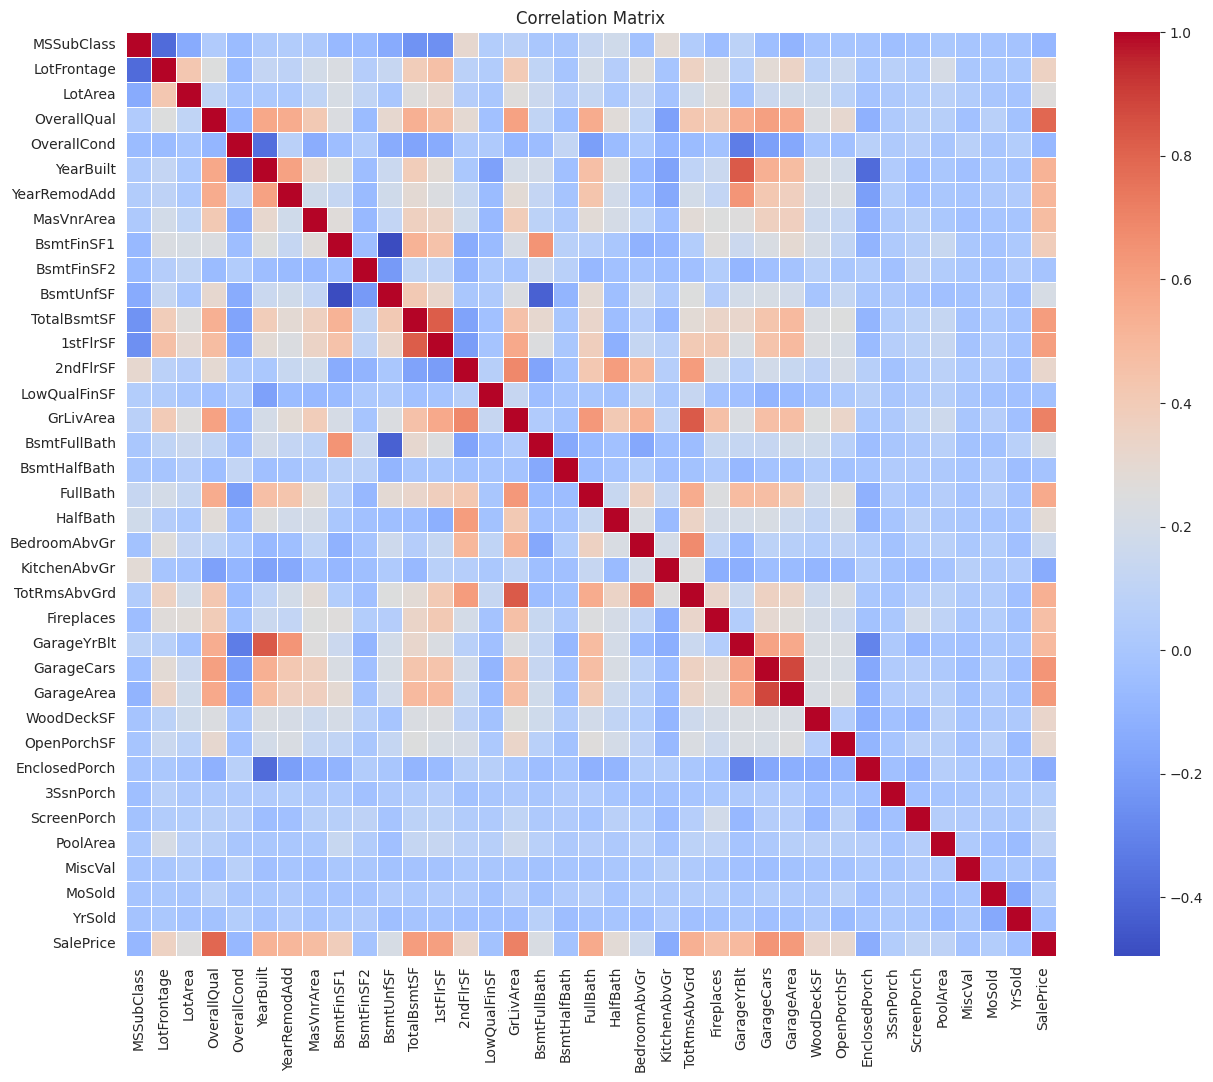

In [ ]:
# Seleccionar solo columnas numéricas para la correlación
corr = entrenamiento.select_dtypes(include=['float64', 'int64']).corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

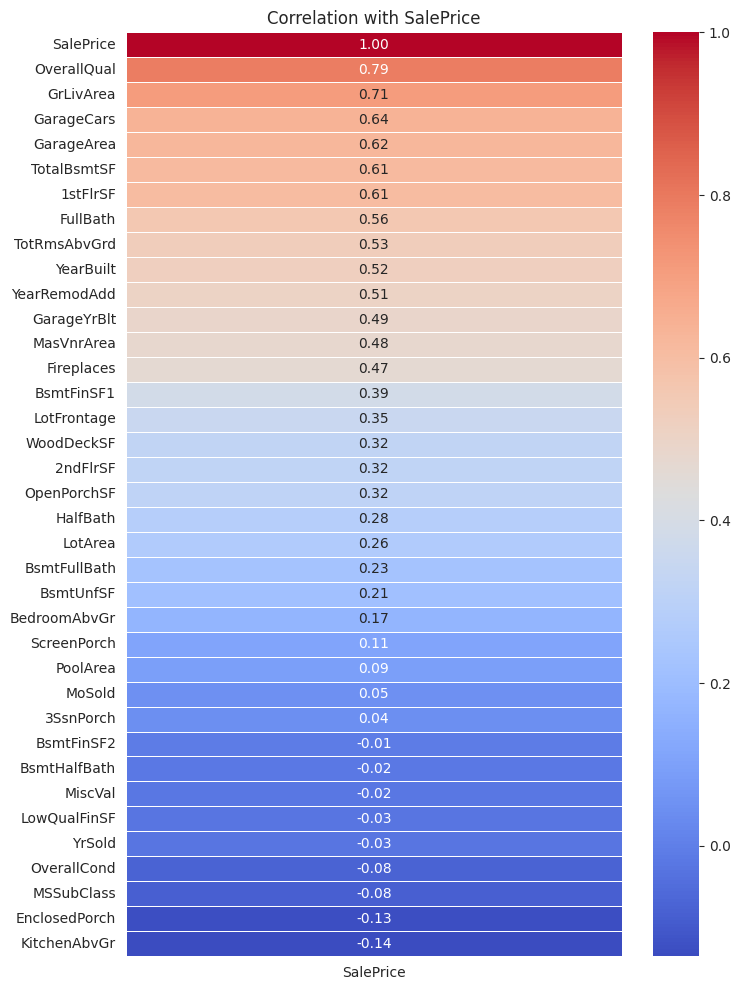

In [ ]:
plt.figure(figsize=(8, 12))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with SalePrice')
plt.show()

#Check the most correlated variables >70% to the target

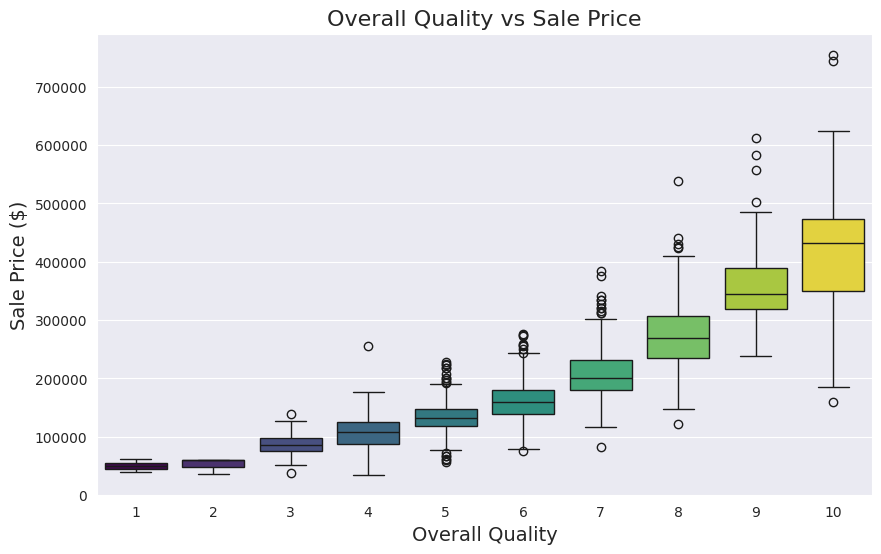

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='OverallQual',
            y='SalePrice',
            data=entrenamiento,
            hue='OverallQual',
            dodge=False,
            palette="viridis",
            legend=False)

plt.xlabel('Overall Quality', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Overall Quality vs Sale Price', fontsize=16)
plt.show()

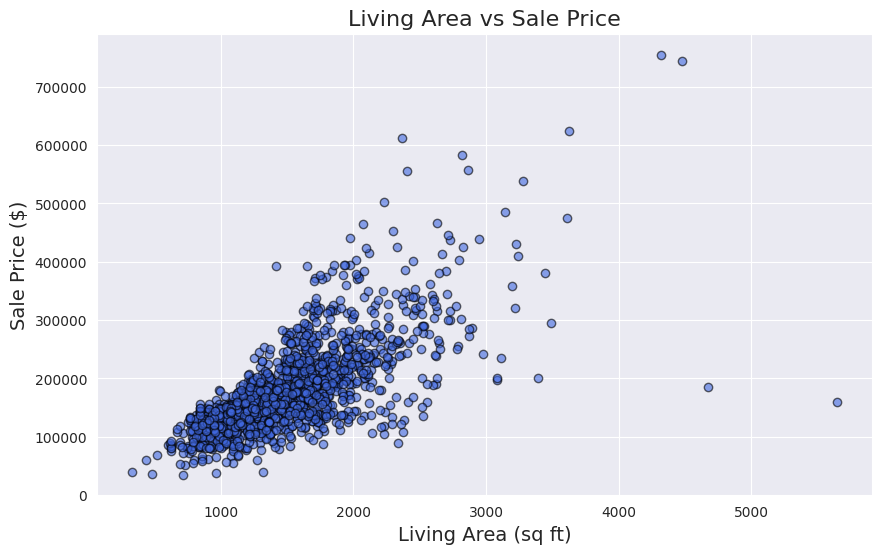

In [ ]:
# Create the figure and axis with larger size
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with custom colors
ax.scatter(x=entrenamiento['GrLivArea'],
           y=entrenamiento['SalePrice'],
           color='royalblue', alpha=0.6, edgecolors='k')

# Labels with increased font size
plt.xlabel('Living Area (sq ft)', fontsize=14)
plt.ylabel('Sale Price ($)', fontsize=14)
plt.title('Living Area vs Sale Price', fontsize=16)

# Show the plot
plt.show()

We can clearly see 2 outliers in the bottom right corner, so they will be removed because there are extremely large areas for very low prices. That does not make sense.

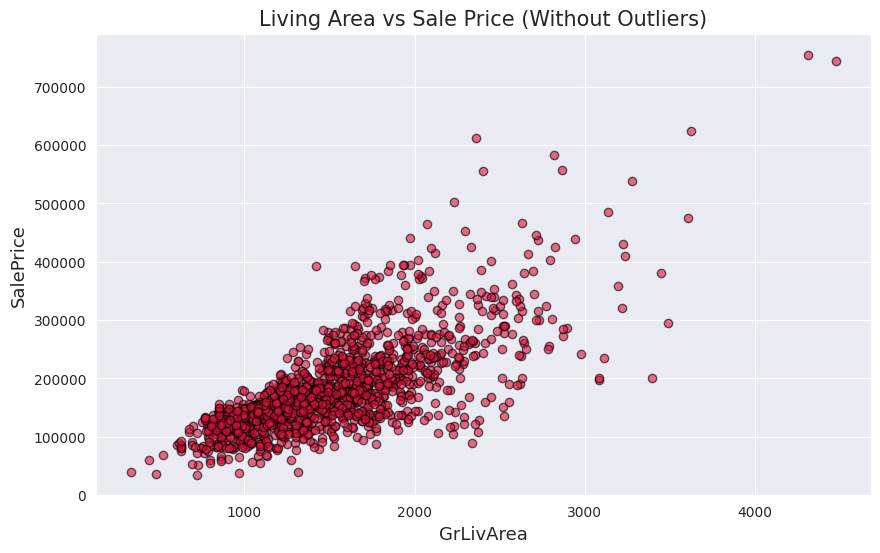

In [ ]:
# Deleting outliers
entrenamiento = entrenamiento.drop(entrenamiento[(entrenamiento['GrLivArea'] > 4000) &
                                                 (entrenamiento['SalePrice'] < 300000)].index)

# Check the graphic again
fig, ax = plt.subplots(figsize=(10, 6))  # Larger size for better readability
ax.scatter(entrenamiento['GrLivArea'], entrenamiento['SalePrice'],
           color='crimson', alpha=0.6, edgecolors='k')

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('Living Area vs Sale Price (Without Outliers)', fontsize=15)
plt.show()

y_xd=entrenamiento['SalePrice']

#Analyze Categorical Values

In [ ]:
def missing_categorical_percentage(df):
  categorical_features = df.select_dtypes(include=['object']).columns
  missing_percentages = df[categorical_features].isnull().mean() * 100
  return missing_percentages


# Example usage:
missing_percentage_train = missing_categorical_percentage(entrenamiento)
print("Missing Percentage in Categorical Variables (Training):\n", missing_percentage_train)

missing_percentage_test = missing_categorical_percentage(prueba)
print("\nMissing Percentage in Categorical Variables (Test):\n", missing_percentage_test)


Missing Percentage in Categorical Variables (Training):
 MSZoning          0.000000
Street            0.000000
Alley            93.758573
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.807956
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.537723
BsmtCond          2.537723
BsmtExposure      2.606310
BsmtFinType1      2.537723
BsmtFinType2      2.606310
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068587
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.325103
GarageType        5.555556
GarageFinish      5.55555


Analyzing column: MSZoning
  Value: RL, Percentage: 78.81%
  Value: RM, Percentage: 14.95%
  Value: FV, Percentage: 4.46%
  Value: RH, Percentage: 1.10%
  Value: C (all), Percentage: 0.69%


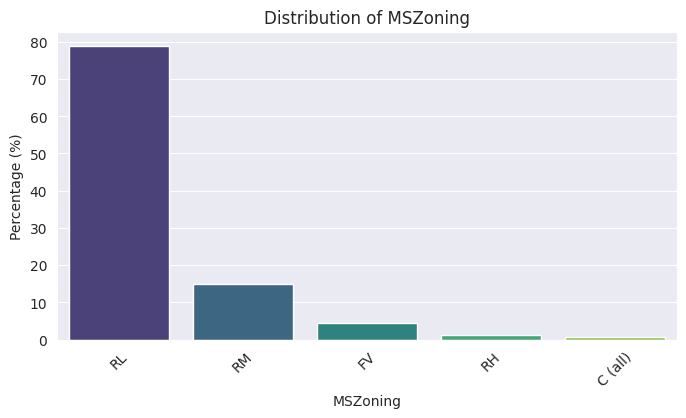


Analyzing column: Street
  Value: Pave, Percentage: 99.59%
  Value: Grvl, Percentage: 0.41%


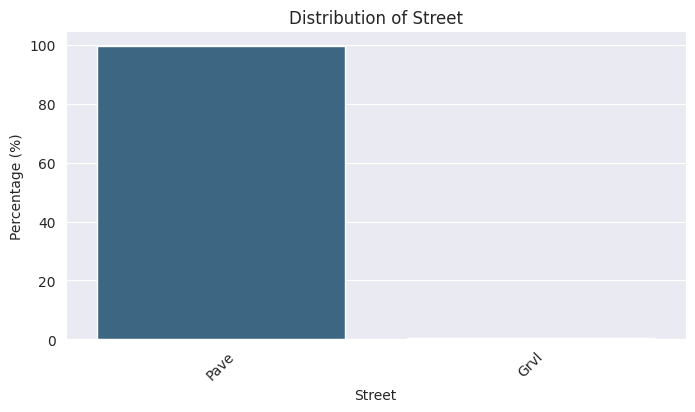


Analyzing column: Alley
  Value: Grvl, Percentage: 54.95%
  Value: Pave, Percentage: 45.05%


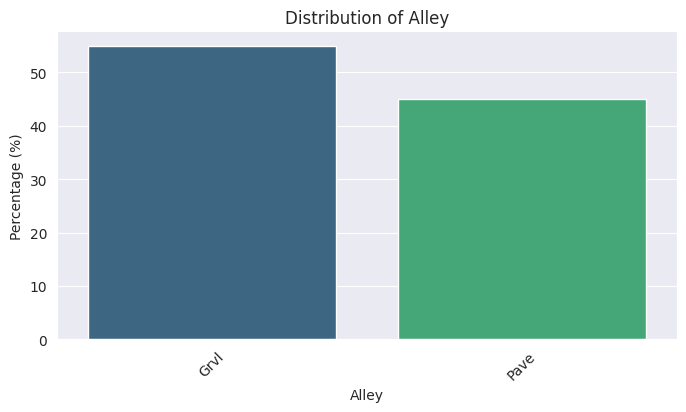


Analyzing column: LotShape
  Value: Reg, Percentage: 63.44%
  Value: IR1, Percentage: 33.13%
  Value: IR2, Percentage: 2.81%
  Value: IR3, Percentage: 0.62%


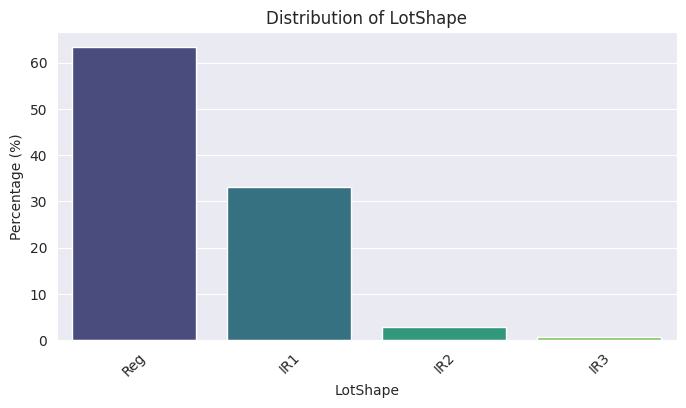


Analyzing column: LandContour
  Value: Lvl, Percentage: 89.92%
  Value: Bnk, Percentage: 4.18%
  Value: HLS, Percentage: 3.43%
  Value: Low, Percentage: 2.47%


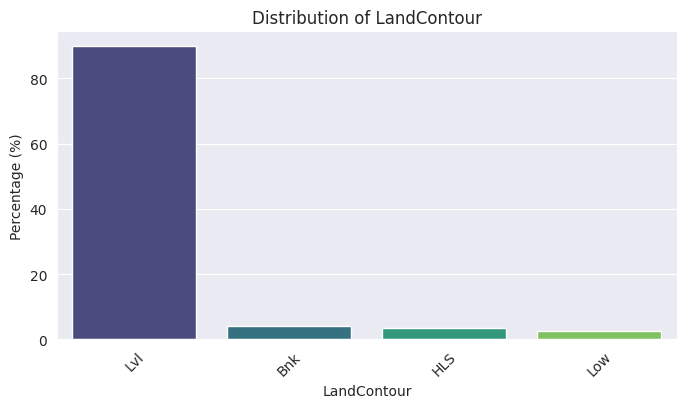


Analyzing column: Utilities
  Value: AllPub, Percentage: 99.93%
  Value: NoSeWa, Percentage: 0.07%


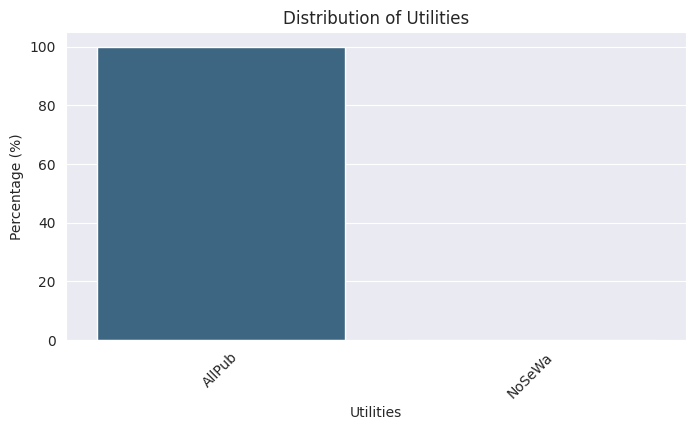


Analyzing column: LotConfig
  Value: Inside, Percentage: 72.09%
  Value: Corner, Percentage: 17.97%
  Value: CulDSac, Percentage: 6.45%
  Value: FR2, Percentage: 3.22%
  Value: FR3, Percentage: 0.27%


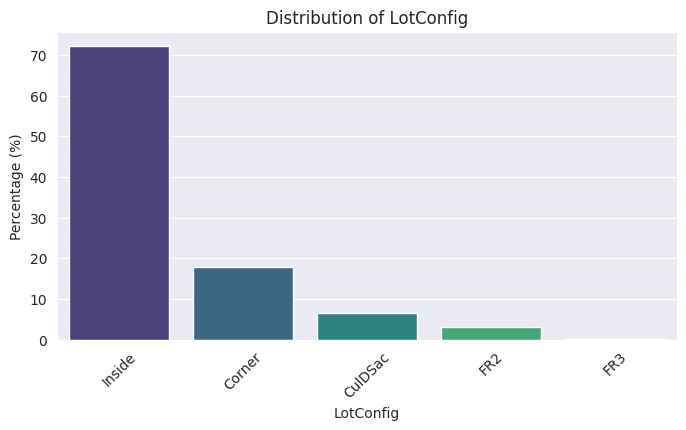


Analyzing column: LandSlope
  Value: Gtl, Percentage: 94.65%
  Value: Mod, Percentage: 4.46%
  Value: Sev, Percentage: 0.89%


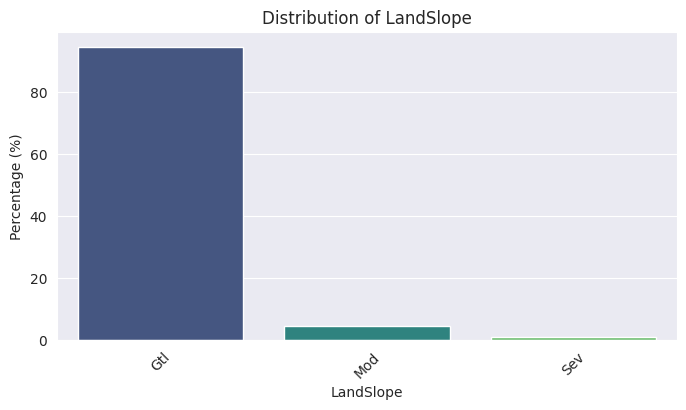


Analyzing column: Neighborhood
  Value: NAmes, Percentage: 15.43%
  Value: CollgCr, Percentage: 10.29%
  Value: OldTown, Percentage: 7.75%
  Value: Edwards, Percentage: 6.72%
  Value: Somerst, Percentage: 5.90%
  Value: Gilbert, Percentage: 5.42%
  Value: NridgHt, Percentage: 5.28%
  Value: Sawyer, Percentage: 5.08%
  Value: NWAmes, Percentage: 5.01%
  Value: SawyerW, Percentage: 4.05%
  Value: BrkSide, Percentage: 3.98%
  Value: Crawfor, Percentage: 3.50%
  Value: Mitchel, Percentage: 3.36%
  Value: NoRidge, Percentage: 2.81%
  Value: Timber, Percentage: 2.61%
  Value: IDOTRR, Percentage: 2.54%
  Value: ClearCr, Percentage: 1.92%
  Value: SWISU, Percentage: 1.71%
  Value: StoneBr, Percentage: 1.71%
  Value: Blmngtn, Percentage: 1.17%
  Value: MeadowV, Percentage: 1.17%
  Value: BrDale, Percentage: 1.10%
  Value: Veenker, Percentage: 0.75%
  Value: NPkVill, Percentage: 0.62%
  Value: Blueste, Percentage: 0.14%


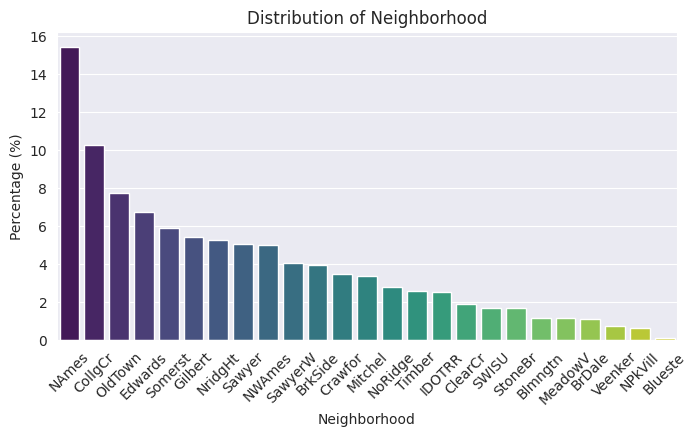


Analyzing column: Condition1
  Value: Norm, Percentage: 86.42%
  Value: Feedr, Percentage: 5.49%
  Value: Artery, Percentage: 3.29%
  Value: RRAn, Percentage: 1.78%
  Value: PosN, Percentage: 1.23%
  Value: RRAe, Percentage: 0.75%
  Value: PosA, Percentage: 0.55%
  Value: RRNn, Percentage: 0.34%
  Value: RRNe, Percentage: 0.14%


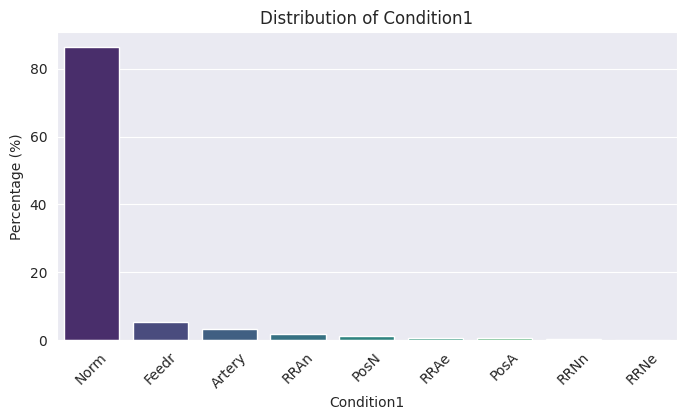


Analyzing column: Condition2
  Value: Norm, Percentage: 99.04%
  Value: Feedr, Percentage: 0.41%
  Value: Artery, Percentage: 0.14%
  Value: RRNn, Percentage: 0.14%
  Value: PosA, Percentage: 0.07%
  Value: PosN, Percentage: 0.07%
  Value: RRAn, Percentage: 0.07%
  Value: RRAe, Percentage: 0.07%


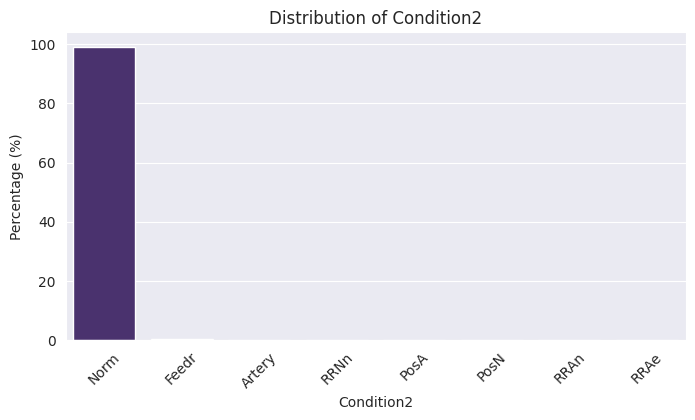


Analyzing column: BldgType
  Value: 1Fam, Percentage: 83.54%
  Value: TwnhsE, Percentage: 7.82%
  Value: Duplex, Percentage: 3.57%
  Value: Twnhs, Percentage: 2.95%
  Value: 2fmCon, Percentage: 2.13%


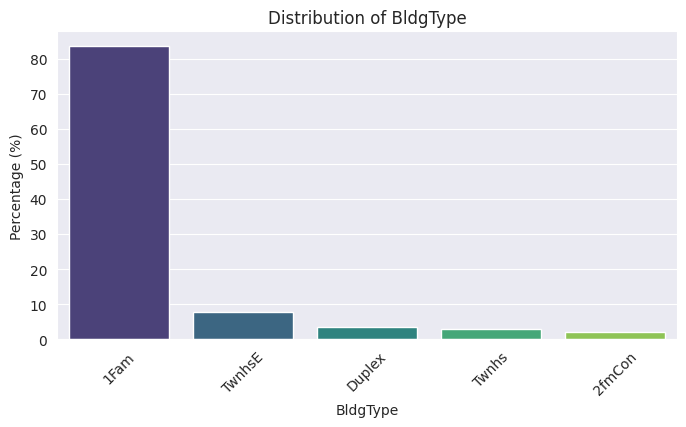


Analyzing column: HouseStyle
  Value: 1Story, Percentage: 49.79%
  Value: 2Story, Percentage: 30.38%
  Value: 1.5Fin, Percentage: 10.56%
  Value: SLvl, Percentage: 4.46%
  Value: SFoyer, Percentage: 2.54%
  Value: 1.5Unf, Percentage: 0.96%
  Value: 2.5Unf, Percentage: 0.75%
  Value: 2.5Fin, Percentage: 0.55%


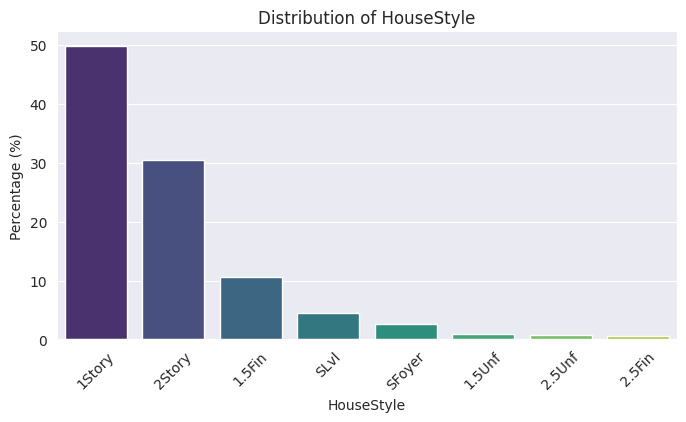


Analyzing column: RoofStyle
  Value: Gable, Percentage: 78.26%
  Value: Hip, Percentage: 19.48%
  Value: Flat, Percentage: 0.89%
  Value: Gambrel, Percentage: 0.75%
  Value: Mansard, Percentage: 0.48%
  Value: Shed, Percentage: 0.14%


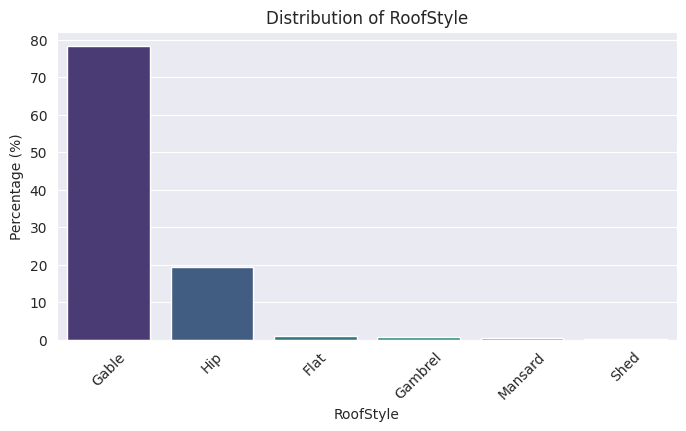


Analyzing column: RoofMatl
  Value: CompShg, Percentage: 98.29%
  Value: Tar&Grv, Percentage: 0.75%
  Value: WdShngl, Percentage: 0.41%
  Value: WdShake, Percentage: 0.34%
  Value: Metal, Percentage: 0.07%
  Value: Membran, Percentage: 0.07%
  Value: Roll, Percentage: 0.07%


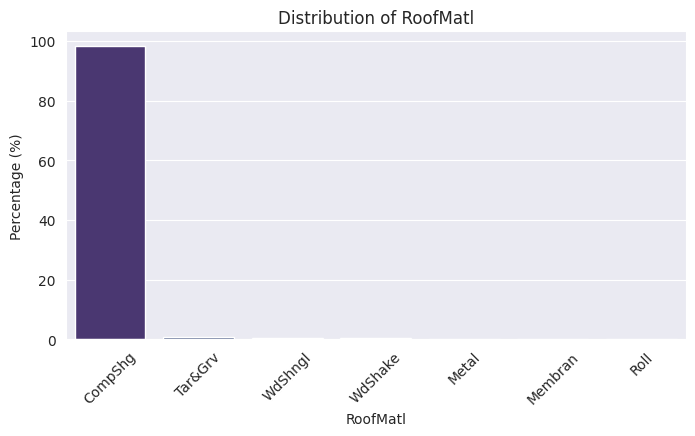


Analyzing column: Exterior1st
  Value: VinylSd, Percentage: 35.32%
  Value: HdBoard, Percentage: 15.23%
  Value: MetalSd, Percentage: 15.09%
  Value: Wd Sdng, Percentage: 14.13%
  Value: Plywood, Percentage: 7.41%
  Value: CemntBd, Percentage: 4.12%
  Value: BrkFace, Percentage: 3.43%
  Value: WdShing, Percentage: 1.78%
  Value: Stucco, Percentage: 1.65%
  Value: AsbShng, Percentage: 1.37%
  Value: BrkComm, Percentage: 0.14%
  Value: Stone, Percentage: 0.14%
  Value: AsphShn, Percentage: 0.07%
  Value: ImStucc, Percentage: 0.07%
  Value: CBlock, Percentage: 0.07%


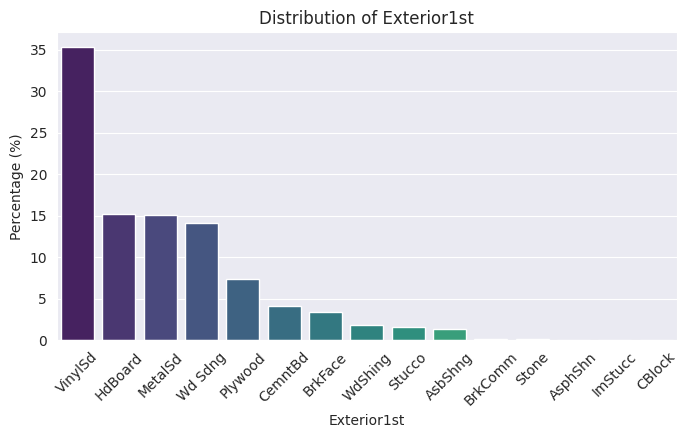


Analyzing column: Exterior2nd
  Value: VinylSd, Percentage: 34.57%
  Value: MetalSd, Percentage: 14.68%
  Value: HdBoard, Percentage: 14.20%
  Value: Wd Sdng, Percentage: 13.51%
  Value: Plywood, Percentage: 9.74%
  Value: CmentBd, Percentage: 4.05%
  Value: Wd Shng, Percentage: 2.61%
  Value: BrkFace, Percentage: 1.71%
  Value: Stucco, Percentage: 1.71%
  Value: AsbShng, Percentage: 1.37%
  Value: ImStucc, Percentage: 0.69%
  Value: Brk Cmn, Percentage: 0.48%
  Value: Stone, Percentage: 0.34%
  Value: AsphShn, Percentage: 0.21%
  Value: Other, Percentage: 0.07%
  Value: CBlock, Percentage: 0.07%


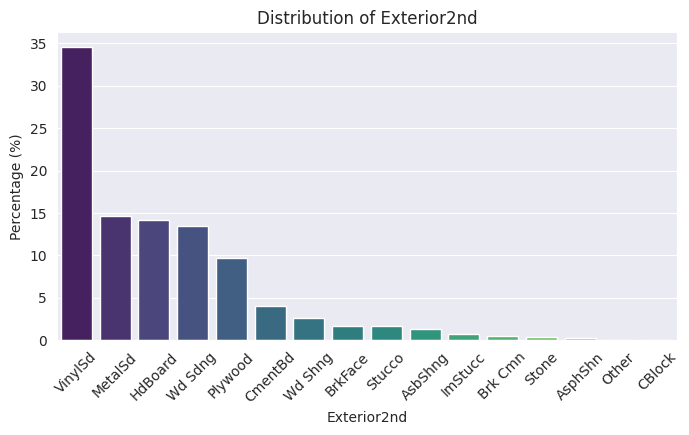


Analyzing column: MasVnrType
  Value: BrkFace, Percentage: 75.94%
  Value: Stone, Percentage: 21.50%
  Value: BrkCmn, Percentage: 2.56%


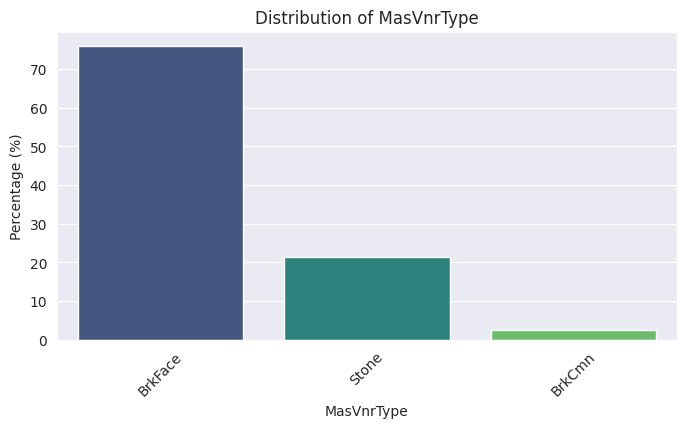


Analyzing column: ExterQual
  Value: TA, Percentage: 62.14%
  Value: Gd, Percentage: 33.47%
  Value: Ex, Percentage: 3.43%
  Value: Fa, Percentage: 0.96%


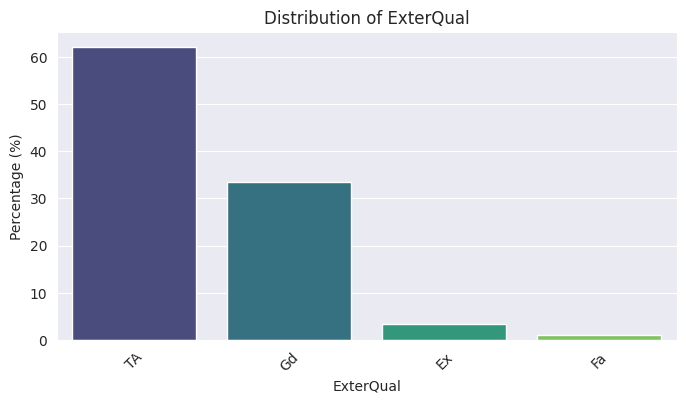


Analyzing column: ExterCond
  Value: TA, Percentage: 87.79%
  Value: Gd, Percentage: 10.01%
  Value: Fa, Percentage: 1.92%
  Value: Ex, Percentage: 0.21%
  Value: Po, Percentage: 0.07%


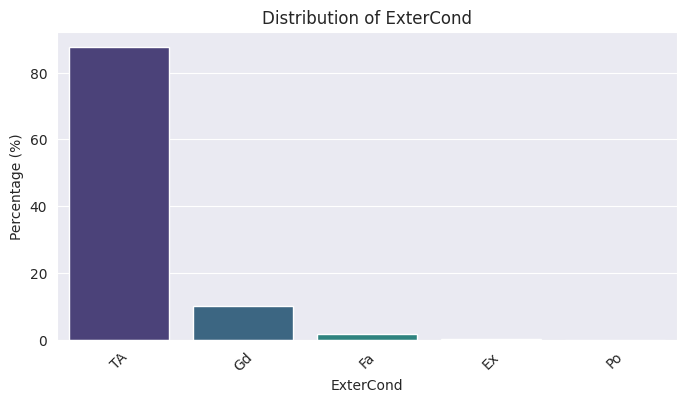


Analyzing column: Foundation
  Value: PConc, Percentage: 44.24%
  Value: CBlock, Percentage: 43.48%
  Value: BrkTil, Percentage: 10.01%
  Value: Slab, Percentage: 1.65%
  Value: Stone, Percentage: 0.41%
  Value: Wood, Percentage: 0.21%


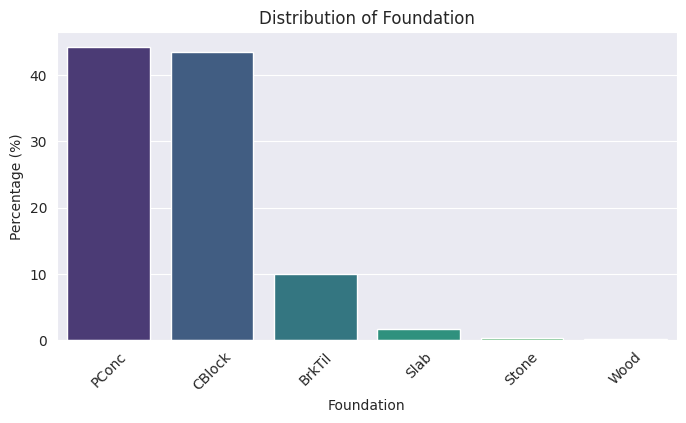


Analyzing column: BsmtQual
  Value: TA, Percentage: 45.67%
  Value: Gd, Percentage: 43.49%
  Value: Ex, Percentage: 8.37%
  Value: Fa, Percentage: 2.46%


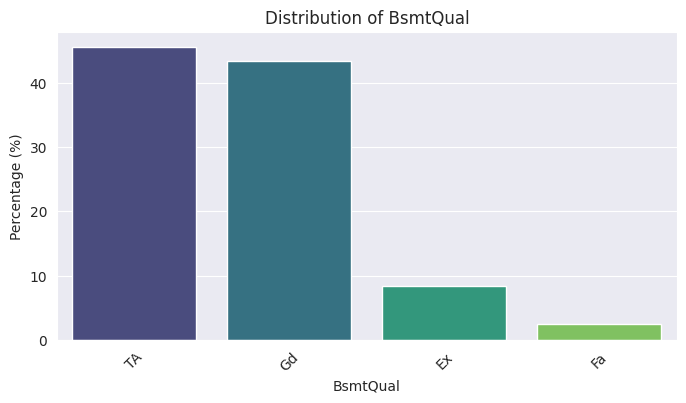


Analyzing column: BsmtCond
  Value: TA, Percentage: 92.12%
  Value: Gd, Percentage: 4.57%
  Value: Fa, Percentage: 3.17%
  Value: Po, Percentage: 0.14%


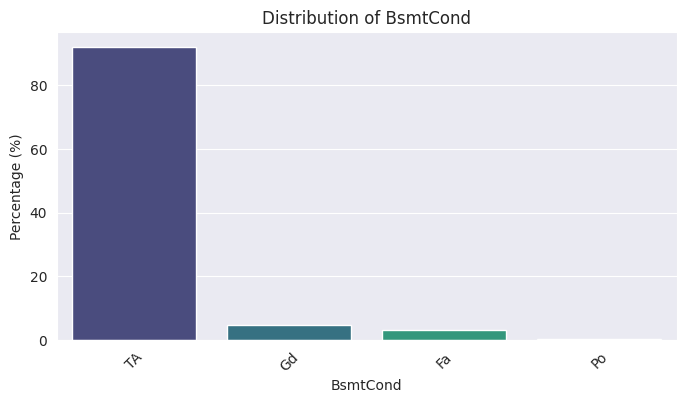


Analyzing column: BsmtExposure
  Value: No, Percentage: 67.11%
  Value: Av, Percentage: 15.56%
  Value: Gd, Percentage: 9.30%
  Value: Mn, Percentage: 8.03%


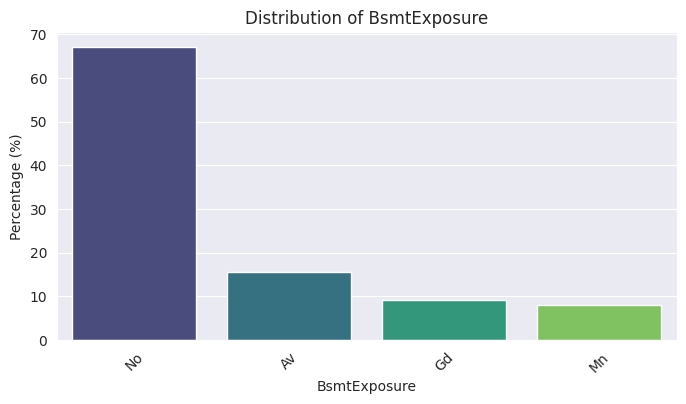


Analyzing column: BsmtFinType1
  Value: Unf, Percentage: 30.26%
  Value: GLQ, Percentage: 29.28%
  Value: ALQ, Percentage: 15.48%
  Value: BLQ, Percentage: 10.42%
  Value: Rec, Percentage: 9.36%
  Value: LwQ, Percentage: 5.21%


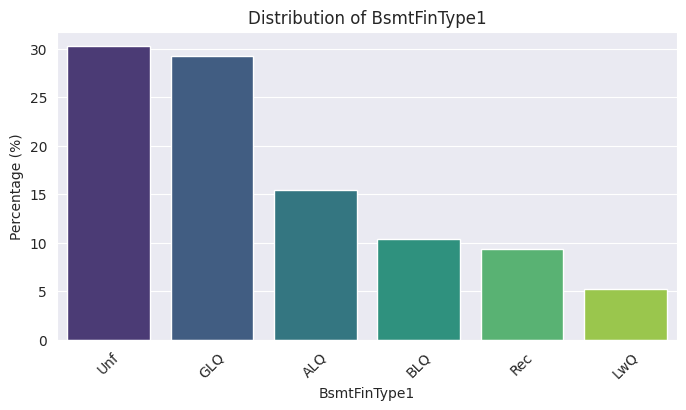


Analyzing column: BsmtFinType2
  Value: Unf, Percentage: 88.31%
  Value: Rec, Percentage: 3.80%
  Value: LwQ, Percentage: 3.24%
  Value: BLQ, Percentage: 2.32%
  Value: ALQ, Percentage: 1.34%
  Value: GLQ, Percentage: 0.99%


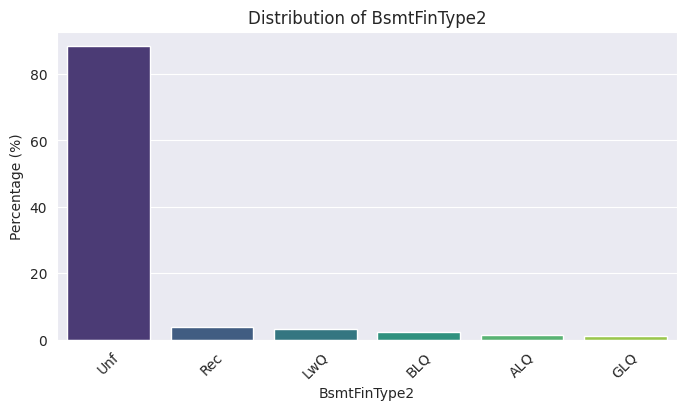


Analyzing column: Heating
  Value: GasA, Percentage: 97.81%
  Value: GasW, Percentage: 1.23%
  Value: Grav, Percentage: 0.48%
  Value: Wall, Percentage: 0.27%
  Value: OthW, Percentage: 0.14%
  Value: Floor, Percentage: 0.07%


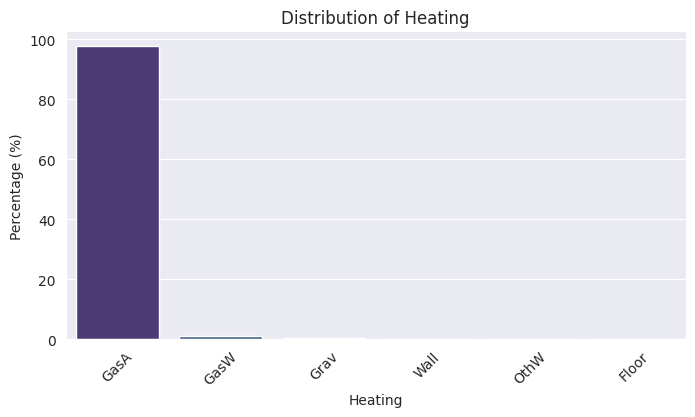


Analyzing column: HeatingQC
  Value: Ex, Percentage: 50.69%
  Value: TA, Percentage: 29.36%
  Value: Gd, Percentage: 16.53%
  Value: Fa, Percentage: 3.36%
  Value: Po, Percentage: 0.07%


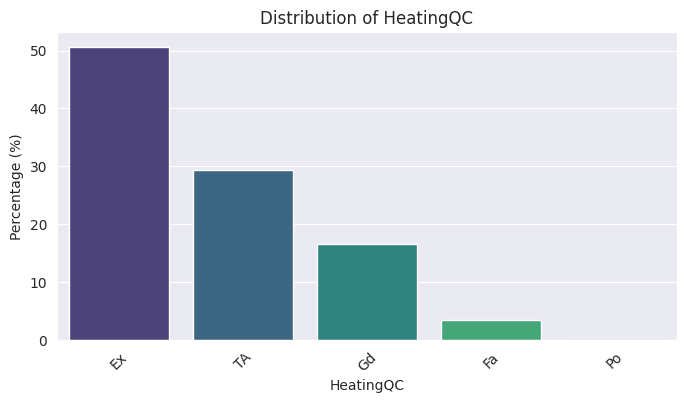


Analyzing column: CentralAir
  Value: Y, Percentage: 93.48%
  Value: N, Percentage: 6.52%


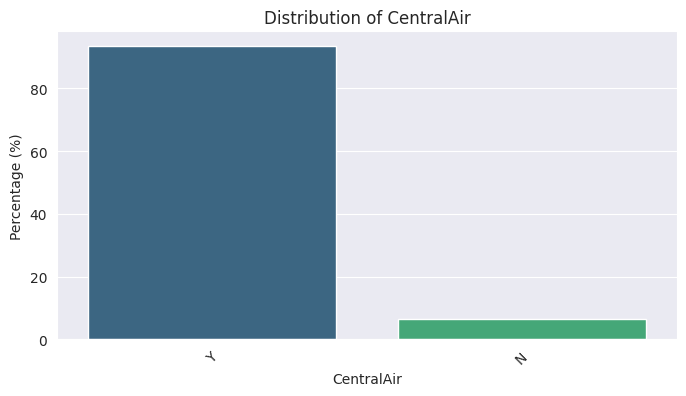


Analyzing column: Electrical
  Value: SBrkr, Percentage: 91.42%
  Value: FuseA, Percentage: 6.45%
  Value: FuseF, Percentage: 1.85%
  Value: FuseP, Percentage: 0.21%
  Value: Mix, Percentage: 0.07%


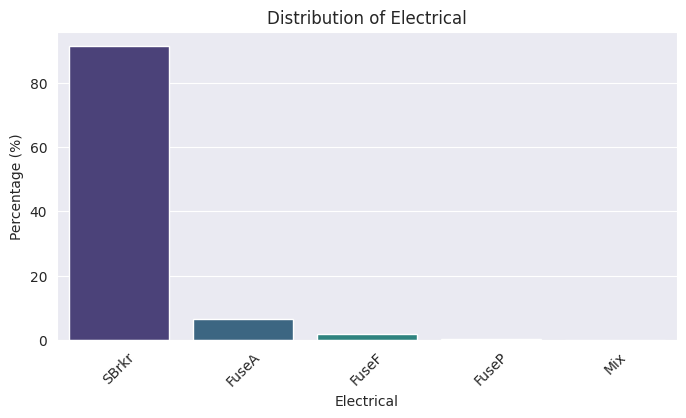


Analyzing column: KitchenQual
  Value: TA, Percentage: 50.41%
  Value: Gd, Percentage: 40.19%
  Value: Ex, Percentage: 6.72%
  Value: Fa, Percentage: 2.67%


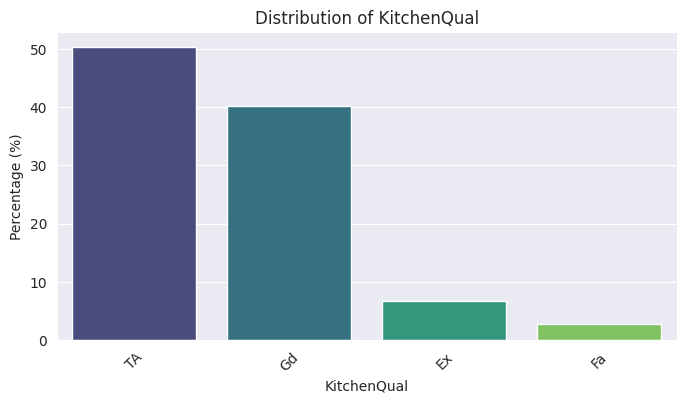


Analyzing column: Functional
  Value: Typ, Percentage: 93.14%
  Value: Min2, Percentage: 2.33%
  Value: Min1, Percentage: 2.13%
  Value: Mod, Percentage: 1.03%
  Value: Maj1, Percentage: 0.96%
  Value: Maj2, Percentage: 0.34%
  Value: Sev, Percentage: 0.07%


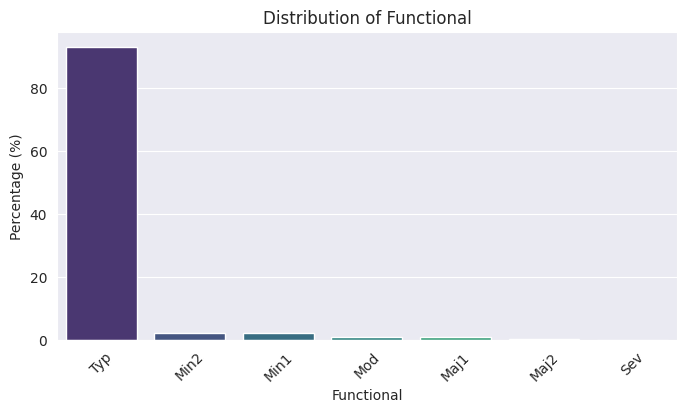


Analyzing column: FireplaceQu
  Value: Gd, Percentage: 49.22%
  Value: TA, Percentage: 40.76%
  Value: Fa, Percentage: 4.30%
  Value: Ex, Percentage: 3.12%
  Value: Po, Percentage: 2.60%


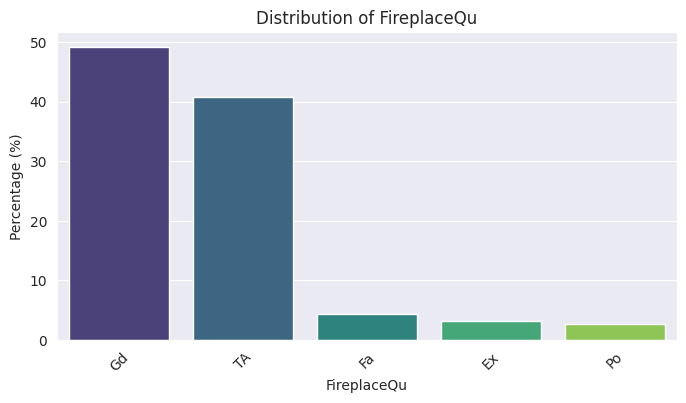


Analyzing column: GarageType
  Value: Attchd, Percentage: 63.11%
  Value: Detchd, Percentage: 28.10%
  Value: BuiltIn, Percentage: 6.32%
  Value: Basment, Percentage: 1.38%
  Value: CarPort, Percentage: 0.65%
  Value: 2Types, Percentage: 0.44%


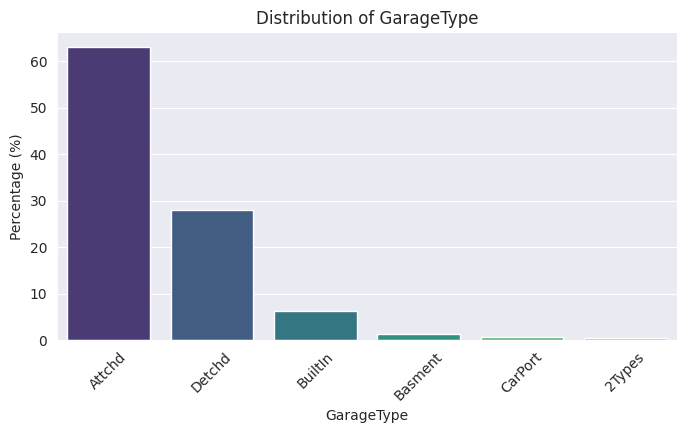


Analyzing column: GarageFinish
  Value: Unf, Percentage: 43.94%
  Value: RFn, Percentage: 30.65%
  Value: Fin, Percentage: 25.42%


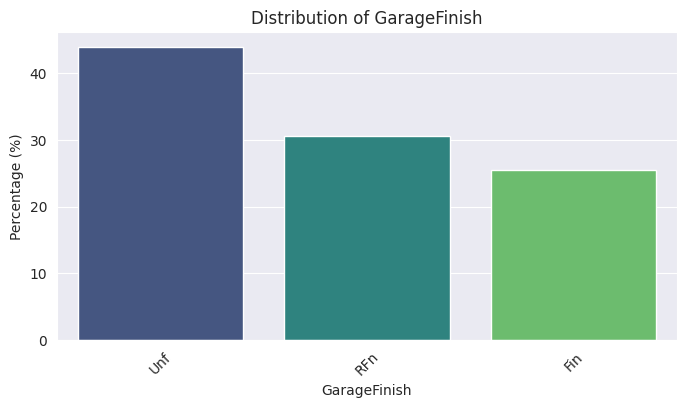


Analyzing column: GarageQual
  Value: TA, Percentage: 95.06%
  Value: Fa, Percentage: 3.49%
  Value: Gd, Percentage: 1.02%
  Value: Ex, Percentage: 0.22%
  Value: Po, Percentage: 0.22%


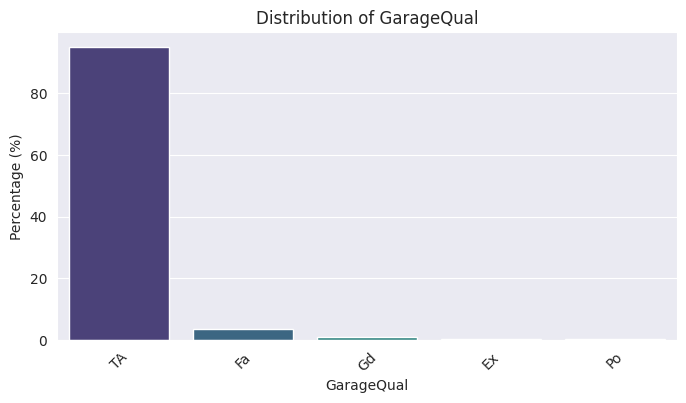


Analyzing column: GarageCond
  Value: TA, Percentage: 96.15%
  Value: Fa, Percentage: 2.54%
  Value: Gd, Percentage: 0.65%
  Value: Po, Percentage: 0.51%
  Value: Ex, Percentage: 0.15%


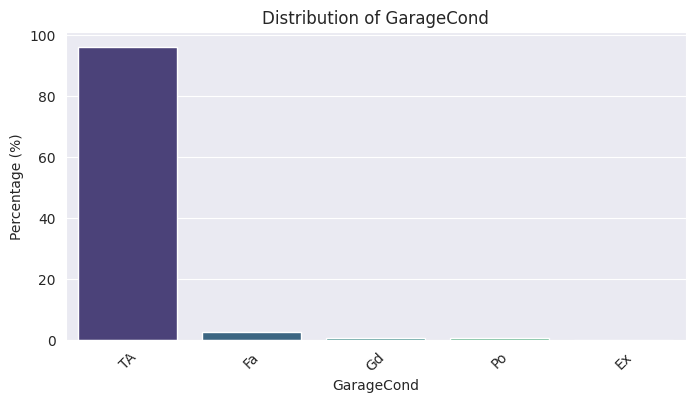


Analyzing column: PavedDrive
  Value: Y, Percentage: 91.77%
  Value: N, Percentage: 6.17%
  Value: P, Percentage: 2.06%


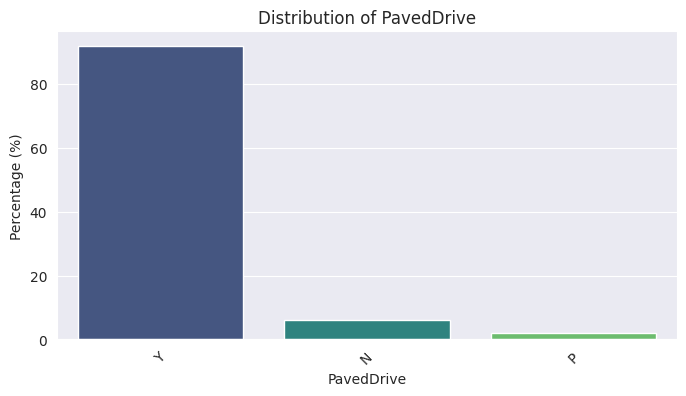


Analyzing column: PoolQC
  Value: Ex, Percentage: 33.33%
  Value: Fa, Percentage: 33.33%
  Value: Gd, Percentage: 33.33%


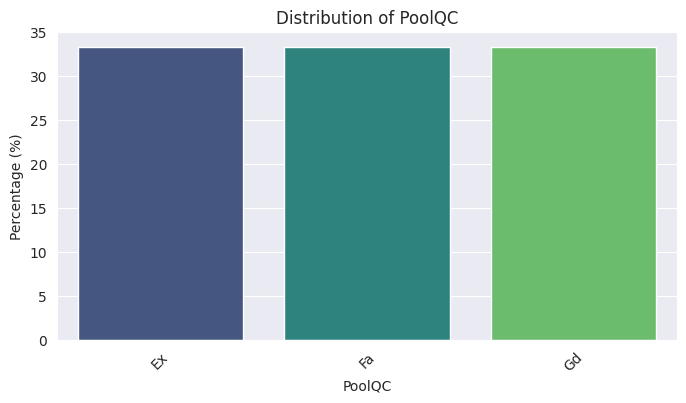


Analyzing column: Fence
  Value: MnPrv, Percentage: 55.87%
  Value: GdPrv, Percentage: 21.00%
  Value: GdWo, Percentage: 19.22%
  Value: MnWw, Percentage: 3.91%


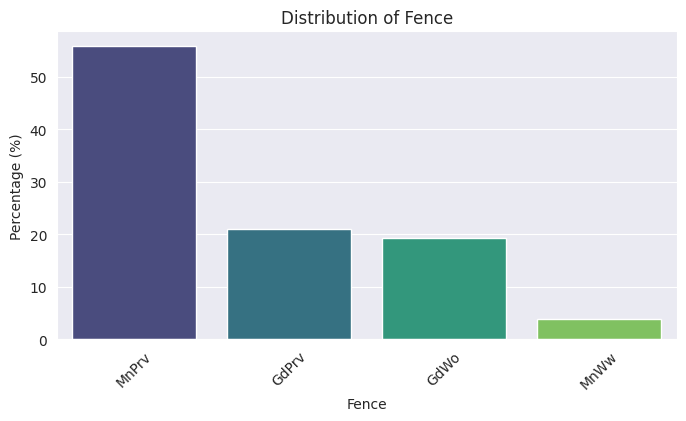


Analyzing column: MiscFeature
  Value: Shed, Percentage: 90.74%
  Value: Gar2, Percentage: 3.70%
  Value: Othr, Percentage: 3.70%
  Value: TenC, Percentage: 1.85%


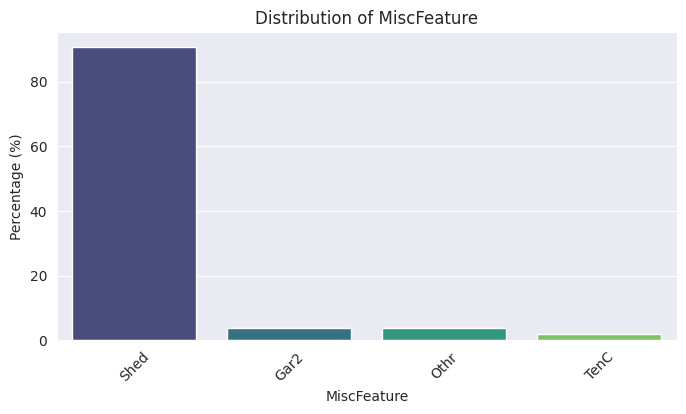


Analyzing column: SaleType
  Value: WD, Percentage: 86.90%
  Value: New, Percentage: 8.23%
  Value: COD, Percentage: 2.95%
  Value: ConLD, Percentage: 0.62%
  Value: ConLI, Percentage: 0.34%
  Value: ConLw, Percentage: 0.34%
  Value: CWD, Percentage: 0.27%
  Value: Oth, Percentage: 0.21%
  Value: Con, Percentage: 0.14%


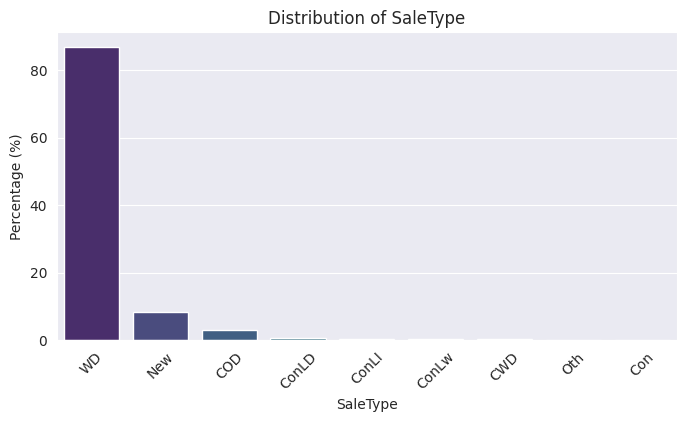


Analyzing column: SaleCondition
  Value: Normal, Percentage: 82.17%
  Value: Partial, Percentage: 8.44%
  Value: Abnorml, Percentage: 6.93%
  Value: Family, Percentage: 1.37%
  Value: Alloca, Percentage: 0.82%
  Value: AdjLand, Percentage: 0.27%


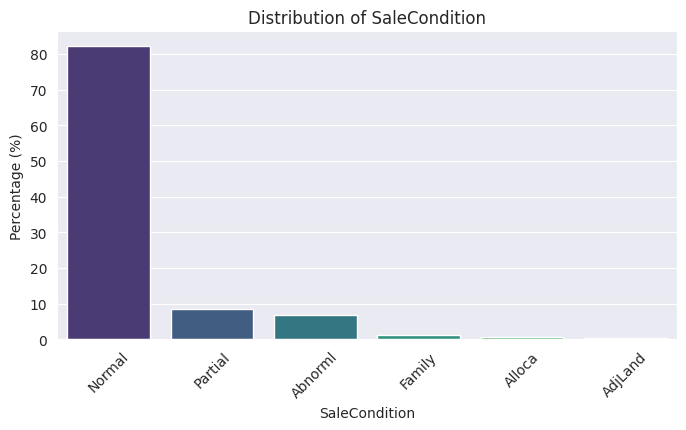

In [ ]:
def analyze_categorical_features(df):
    for column in df.select_dtypes(include=['object']):
        print(f"\nAnalyzing column: {column}")
        value_counts = df[column].value_counts(normalize=True) * 100
        for value, percentage in value_counts.items():
            print(f"  Value: {value}, Percentage: {percentage:.2f}%")


        plt.figure(figsize=(8, 4))
        sns.barplot(x=value_counts.index,
                    y=value_counts.values,
                    hue=value_counts.index,
                    dodge=False,
                    palette="viridis",
                    legend=False)

        plt.xticks(rotation=45)
        plt.xlabel(column)
        plt.ylabel("Percentage (%)")
        plt.title(f"Distribution of {column}")
        plt.show()

analyze_categorical_features(entrenamiento)



Analyzing column: MSZoning
  Value: RL, Percentage: 76.56%
  Value: RM, Percentage: 16.63%
  Value: FV, Percentage: 5.09%
  Value: C (all), Percentage: 1.03%
  Value: RH, Percentage: 0.69%


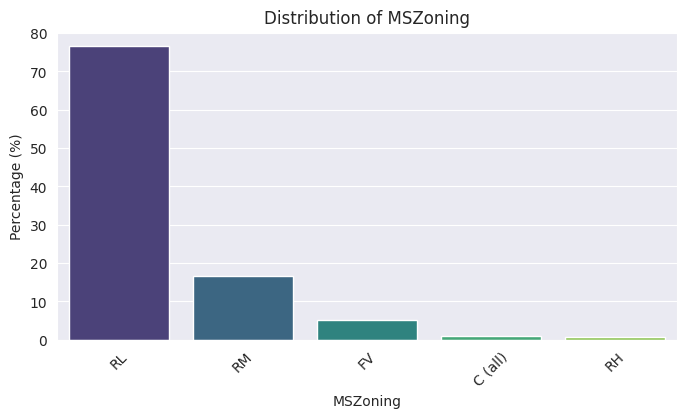


Analyzing column: Street
  Value: Pave, Percentage: 99.59%
  Value: Grvl, Percentage: 0.41%


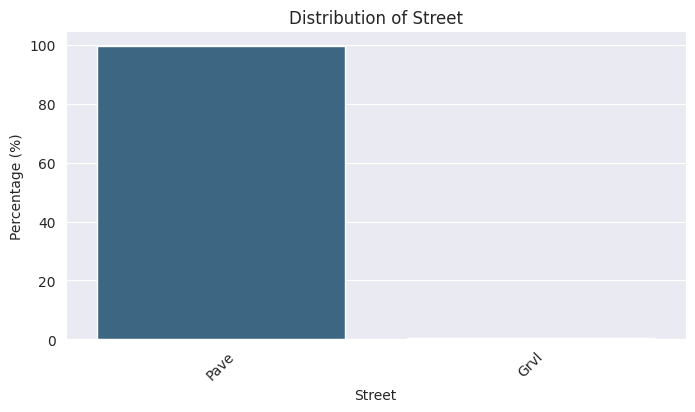


Analyzing column: Alley
  Value: Grvl, Percentage: 65.42%
  Value: Pave, Percentage: 34.58%


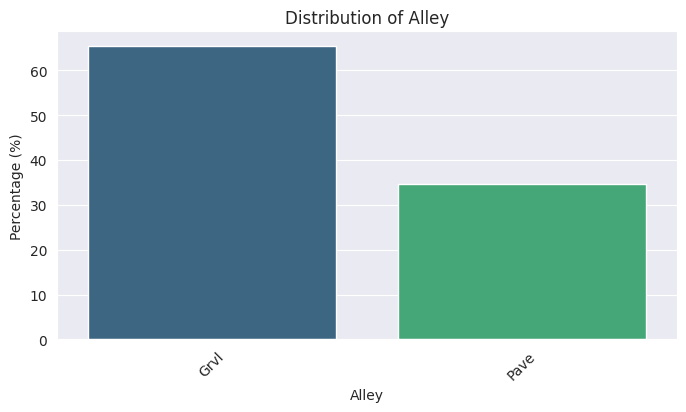


Analyzing column: LotShape
  Value: Reg, Percentage: 64.02%
  Value: IR1, Percentage: 33.17%
  Value: IR2, Percentage: 2.40%
  Value: IR3, Percentage: 0.41%


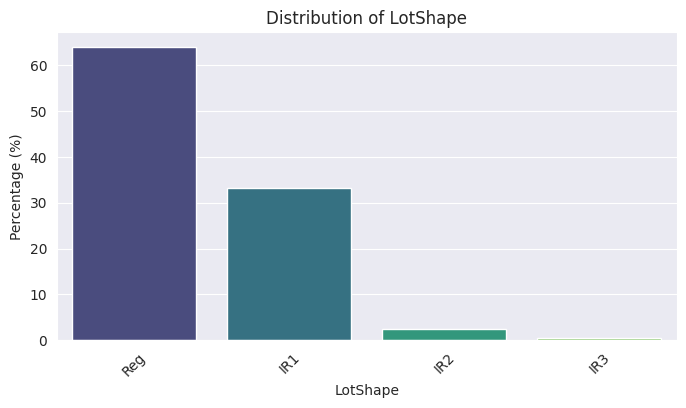


Analyzing column: LandContour
  Value: Lvl, Percentage: 89.86%
  Value: HLS, Percentage: 4.80%
  Value: Bnk, Percentage: 3.70%
  Value: Low, Percentage: 1.64%


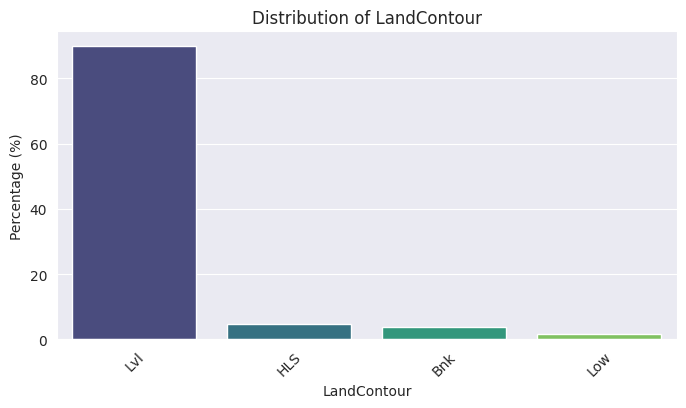


Analyzing column: Utilities
  Value: AllPub, Percentage: 100.00%


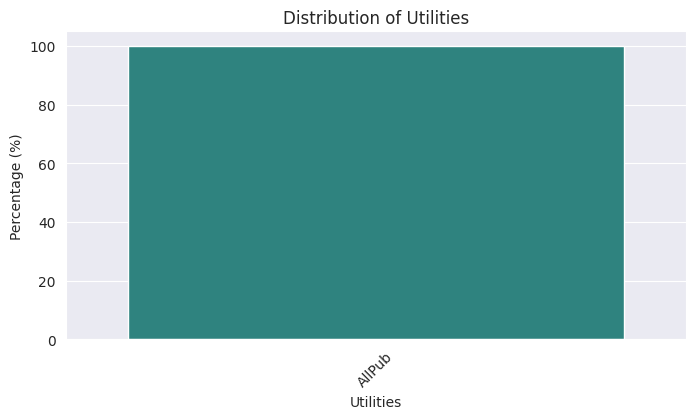


Analyzing column: LotConfig
  Value: Inside, Percentage: 74.09%
  Value: Corner, Percentage: 17.00%
  Value: CulDSac, Percentage: 5.62%
  Value: FR2, Percentage: 2.60%
  Value: FR3, Percentage: 0.69%


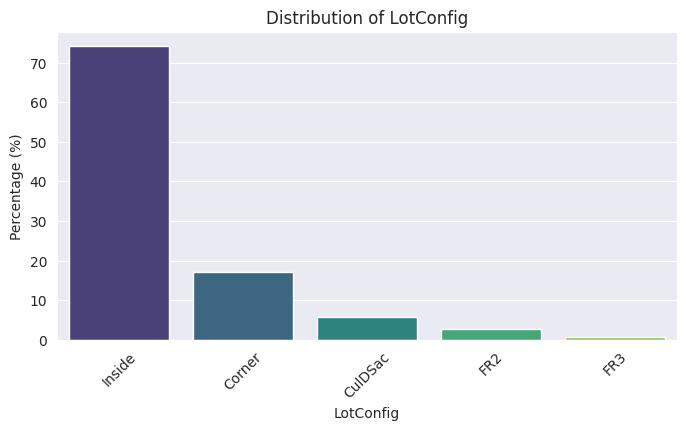


Analyzing column: LandSlope
  Value: Gtl, Percentage: 95.68%
  Value: Mod, Percentage: 4.11%
  Value: Sev, Percentage: 0.21%


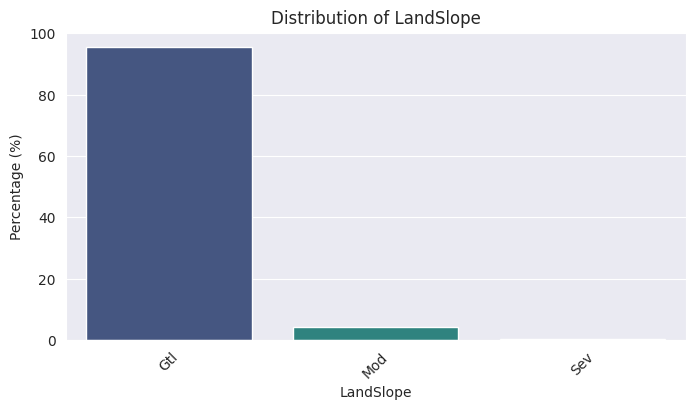


Analyzing column: Neighborhood
  Value: NAmes, Percentage: 14.94%
  Value: OldTown, Percentage: 8.64%
  Value: CollgCr, Percentage: 8.02%
  Value: Somerst, Percentage: 6.58%
  Value: Edwards, Percentage: 6.44%
  Value: NridgHt, Percentage: 6.10%
  Value: Gilbert, Percentage: 5.89%
  Value: Sawyer, Percentage: 5.28%
  Value: SawyerW, Percentage: 4.52%
  Value: Mitchel, Percentage: 4.46%
  Value: NWAmes, Percentage: 3.98%
  Value: IDOTRR, Percentage: 3.84%
  Value: Crawfor, Percentage: 3.56%
  Value: BrkSide, Percentage: 3.43%
  Value: Timber, Percentage: 2.33%
  Value: NoRidge, Percentage: 2.06%
  Value: StoneBr, Percentage: 1.78%
  Value: SWISU, Percentage: 1.58%
  Value: MeadowV, Percentage: 1.37%
  Value: ClearCr, Percentage: 1.10%
  Value: BrDale, Percentage: 0.96%
  Value: NPkVill, Percentage: 0.96%
  Value: Veenker, Percentage: 0.89%
  Value: Blmngtn, Percentage: 0.75%
  Value: Blueste, Percentage: 0.55%


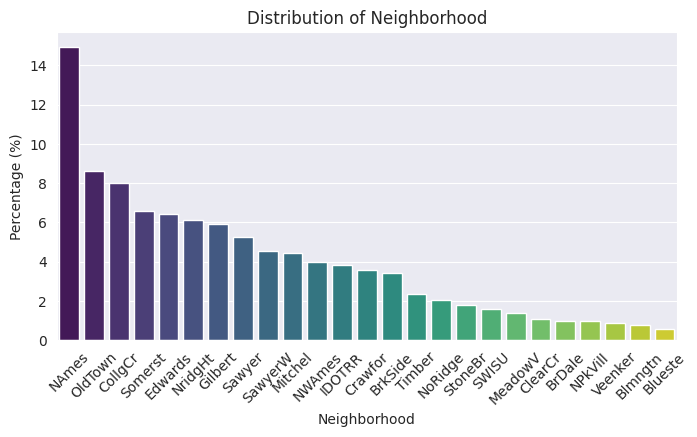


Analyzing column: Condition1
  Value: Norm, Percentage: 85.74%
  Value: Feedr, Percentage: 5.69%
  Value: Artery, Percentage: 3.02%
  Value: RRAn, Percentage: 1.64%
  Value: PosN, Percentage: 1.37%
  Value: RRAe, Percentage: 1.17%
  Value: PosA, Percentage: 0.82%
  Value: RRNe, Percentage: 0.27%
  Value: RRNn, Percentage: 0.27%


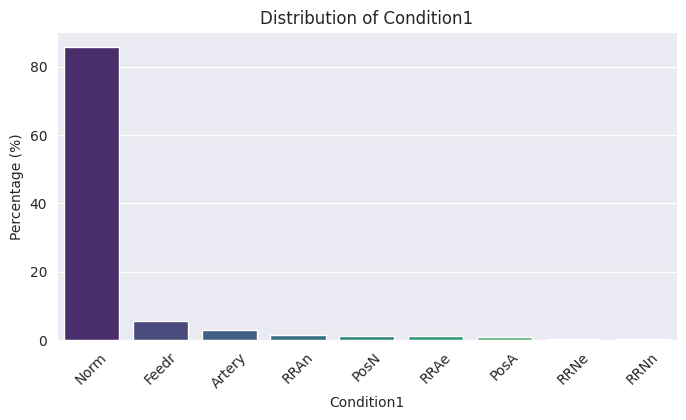


Analyzing column: Condition2
  Value: Norm, Percentage: 98.97%
  Value: Feedr, Percentage: 0.48%
  Value: PosA, Percentage: 0.21%
  Value: Artery, Percentage: 0.21%
  Value: PosN, Percentage: 0.14%


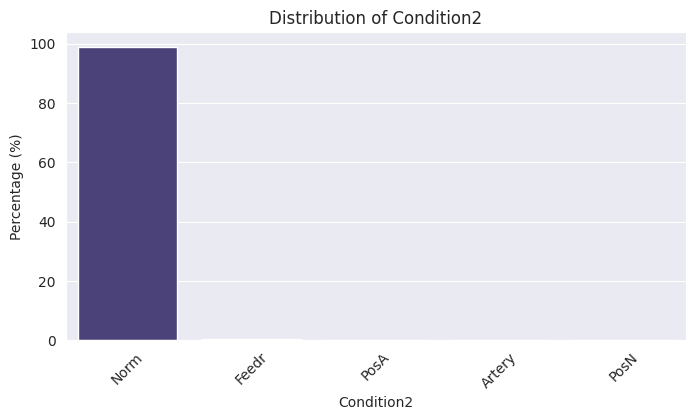


Analyzing column: BldgType
  Value: 1Fam, Percentage: 82.59%
  Value: TwnhsE, Percentage: 7.75%
  Value: Duplex, Percentage: 3.91%
  Value: Twnhs, Percentage: 3.63%
  Value: 2fmCon, Percentage: 2.12%


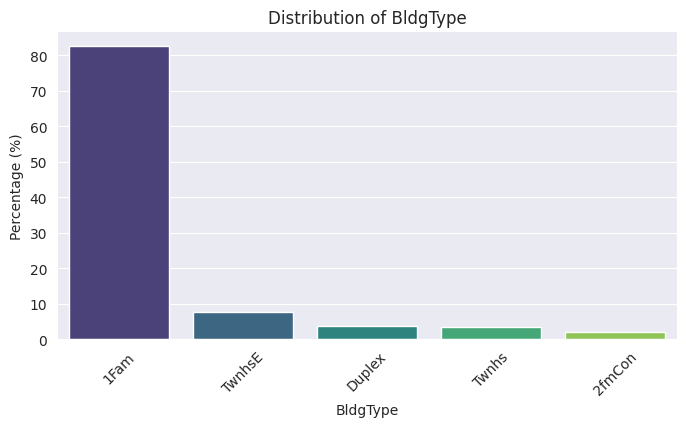


Analyzing column: HouseStyle
  Value: 1Story, Percentage: 51.06%
  Value: 2Story, Percentage: 29.27%
  Value: 1.5Fin, Percentage: 10.97%
  Value: SLvl, Percentage: 4.32%
  Value: SFoyer, Percentage: 3.15%
  Value: 2.5Unf, Percentage: 0.89%
  Value: 1.5Unf, Percentage: 0.34%


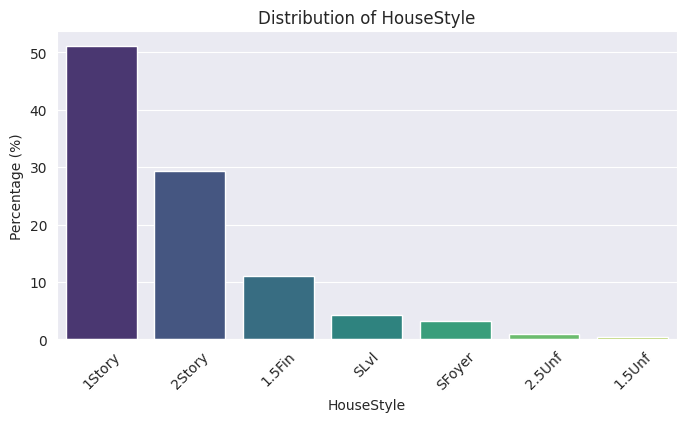


Analyzing column: RoofStyle
  Value: Gable, Percentage: 80.12%
  Value: Hip, Percentage: 18.16%
  Value: Gambrel, Percentage: 0.75%
  Value: Flat, Percentage: 0.48%
  Value: Mansard, Percentage: 0.27%
  Value: Shed, Percentage: 0.21%


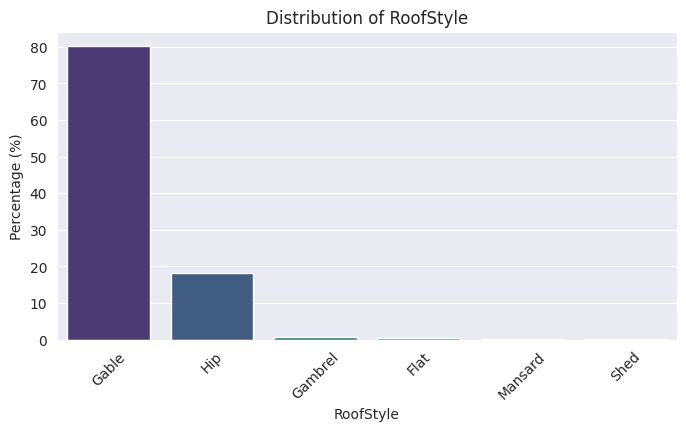


Analyzing column: RoofMatl
  Value: CompShg, Percentage: 98.83%
  Value: Tar&Grv, Percentage: 0.82%
  Value: WdShake, Percentage: 0.27%
  Value: WdShngl, Percentage: 0.07%


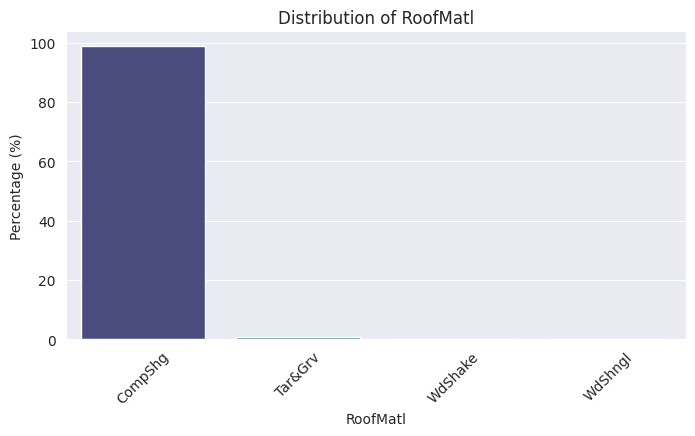


Analyzing column: Exterior1st
  Value: VinylSd, Percentage: 34.98%
  Value: MetalSd, Percentage: 15.78%
  Value: HdBoard, Percentage: 15.09%
  Value: Wd Sdng, Percentage: 14.06%
  Value: Plywood, Percentage: 7.75%
  Value: CemntBd, Percentage: 4.46%
  Value: BrkFace, Percentage: 2.54%
  Value: WdShing, Percentage: 2.06%
  Value: AsbShng, Percentage: 1.65%
  Value: Stucco, Percentage: 1.23%
  Value: BrkComm, Percentage: 0.27%
  Value: AsphShn, Percentage: 0.07%
  Value: CBlock, Percentage: 0.07%


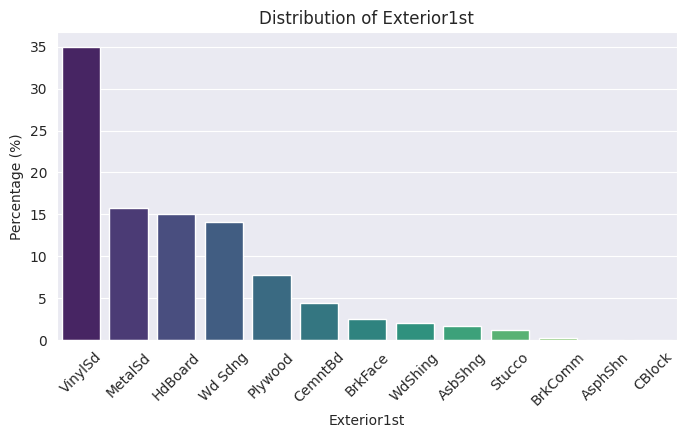


Analyzing column: Exterior2nd
  Value: VinylSd, Percentage: 34.98%
  Value: MetalSd, Percentage: 15.98%
  Value: HdBoard, Percentage: 13.65%
  Value: Wd Sdng, Percentage: 13.31%
  Value: Plywood, Percentage: 8.78%
  Value: CmentBd, Percentage: 4.53%
  Value: Wd Shng, Percentage: 2.95%
  Value: BrkFace, Percentage: 1.51%
  Value: Stucco, Percentage: 1.44%
  Value: AsbShng, Percentage: 1.23%
  Value: Brk Cmn, Percentage: 1.03%
  Value: ImStucc, Percentage: 0.34%
  Value: CBlock, Percentage: 0.14%
  Value: AsphShn, Percentage: 0.07%
  Value: Stone, Percentage: 0.07%


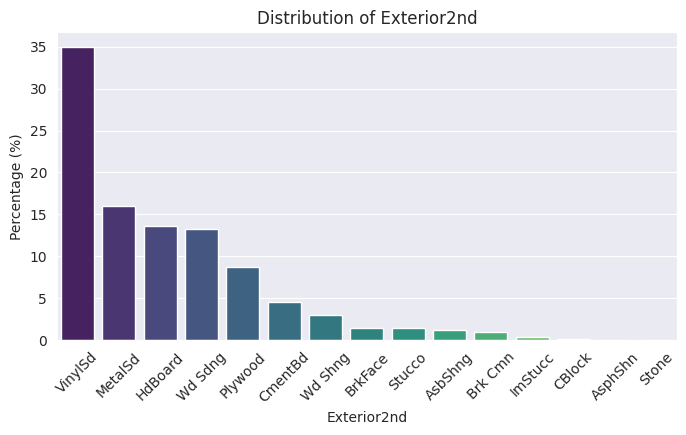


Analyzing column: MasVnrType
  Value: BrkFace, Percentage: 76.81%
  Value: Stone, Percentage: 21.42%
  Value: BrkCmn, Percentage: 1.77%


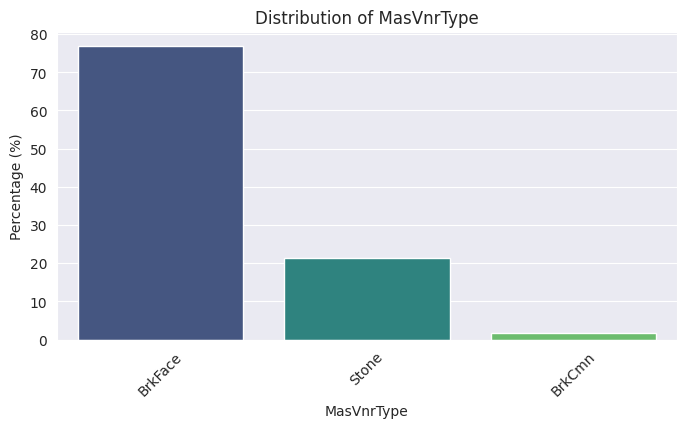


Analyzing column: ExterQual
  Value: TA, Percentage: 61.14%
  Value: Gd, Percentage: 33.65%
  Value: Ex, Percentage: 3.77%
  Value: Fa, Percentage: 1.44%


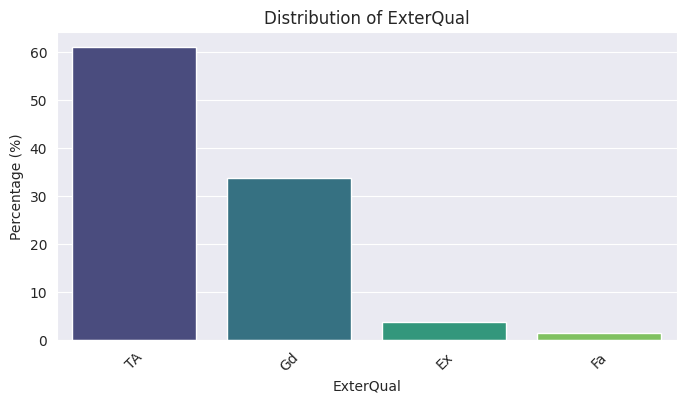


Analyzing column: ExterCond
  Value: TA, Percentage: 86.09%
  Value: Gd, Percentage: 10.49%
  Value: Fa, Percentage: 2.67%
  Value: Ex, Percentage: 0.62%
  Value: Po, Percentage: 0.14%


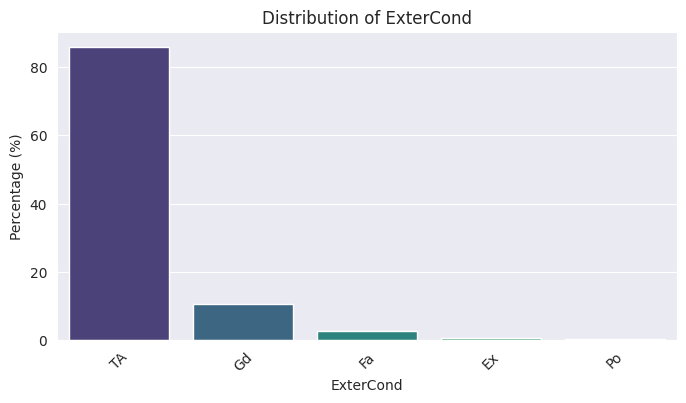


Analyzing column: Foundation
  Value: PConc, Percentage: 45.31%
  Value: CBlock, Percentage: 41.19%
  Value: BrkTil, Percentage: 11.31%
  Value: Slab, Percentage: 1.71%
  Value: Stone, Percentage: 0.34%
  Value: Wood, Percentage: 0.14%


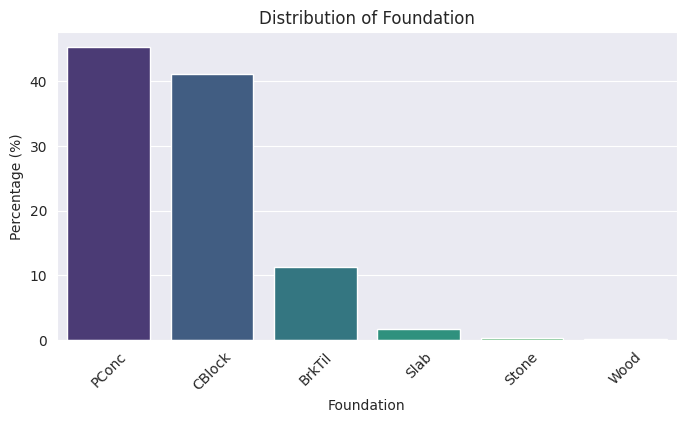


Analyzing column: BsmtQual
  Value: TA, Percentage: 44.81%
  Value: Gd, Percentage: 41.77%
  Value: Ex, Percentage: 9.68%
  Value: Fa, Percentage: 3.75%


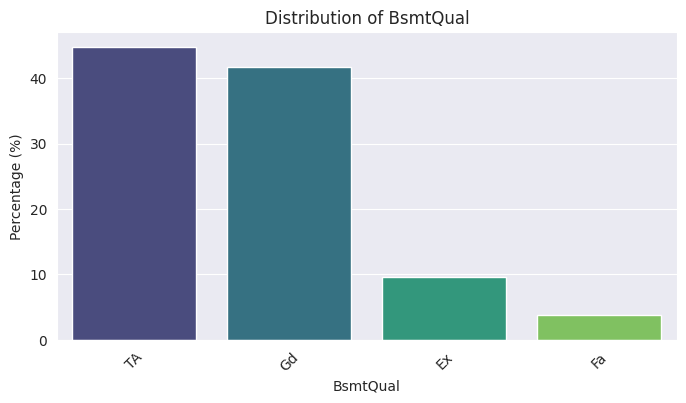


Analyzing column: BsmtCond
  Value: TA, Percentage: 91.58%
  Value: Fa, Percentage: 4.17%
  Value: Gd, Percentage: 4.03%
  Value: Po, Percentage: 0.21%


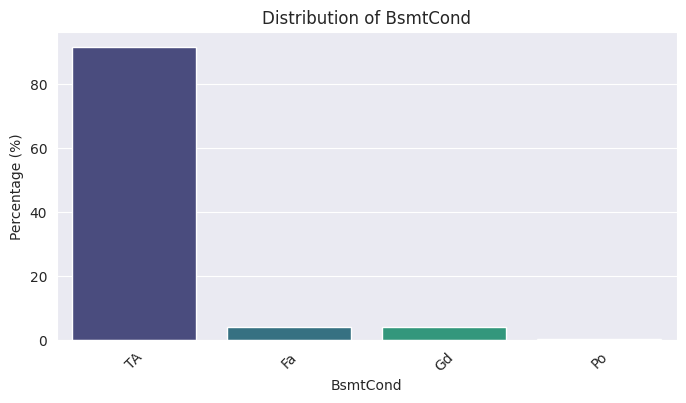


Analyzing column: BsmtExposure
  Value: No, Percentage: 67.21%
  Value: Av, Percentage: 13.92%
  Value: Gd, Percentage: 10.04%
  Value: Mn, Percentage: 8.83%


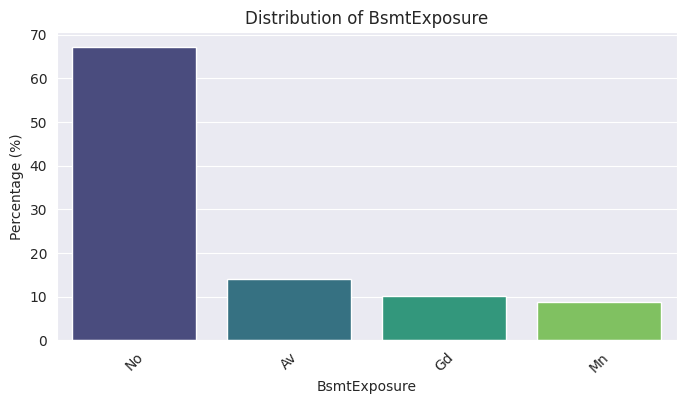


Analyzing column: BsmtFinType1
  Value: GLQ, Percentage: 30.42%
  Value: Unf, Percentage: 29.71%
  Value: ALQ, Percentage: 14.75%
  Value: Rec, Percentage: 10.94%
  Value: BLQ, Percentage: 8.54%
  Value: LwQ, Percentage: 5.65%


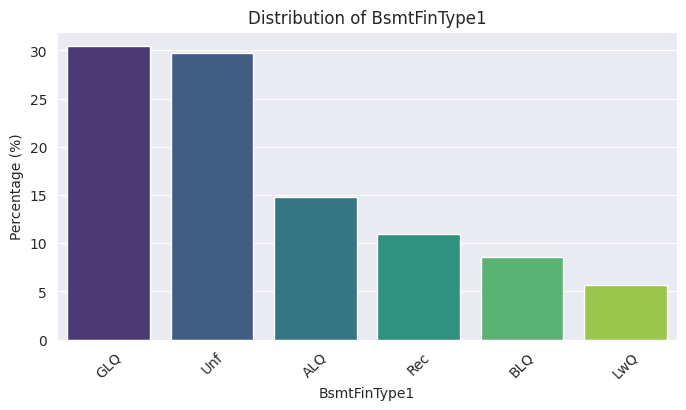


Analyzing column: BsmtFinType2
  Value: Unf, Percentage: 87.30%
  Value: Rec, Percentage: 3.60%
  Value: LwQ, Percentage: 2.89%
  Value: BLQ, Percentage: 2.47%
  Value: ALQ, Percentage: 2.33%
  Value: GLQ, Percentage: 1.41%


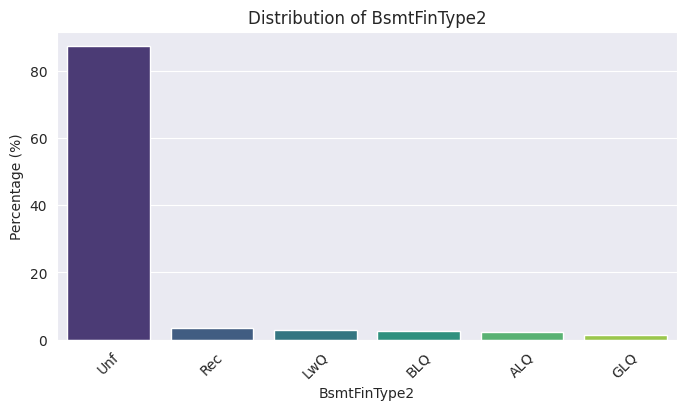


Analyzing column: Heating
  Value: GasA, Percentage: 99.11%
  Value: GasW, Percentage: 0.62%
  Value: Grav, Percentage: 0.14%
  Value: Wall, Percentage: 0.14%


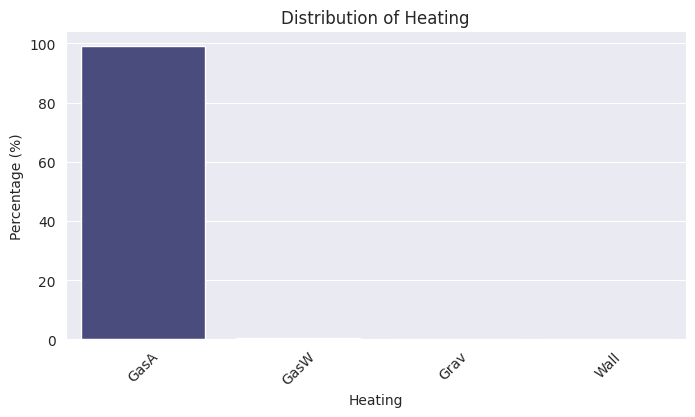


Analyzing column: HeatingQC
  Value: Ex, Percentage: 51.54%
  Value: TA, Percentage: 29.40%
  Value: Gd, Percentage: 15.97%
  Value: Fa, Percentage: 2.95%
  Value: Po, Percentage: 0.14%


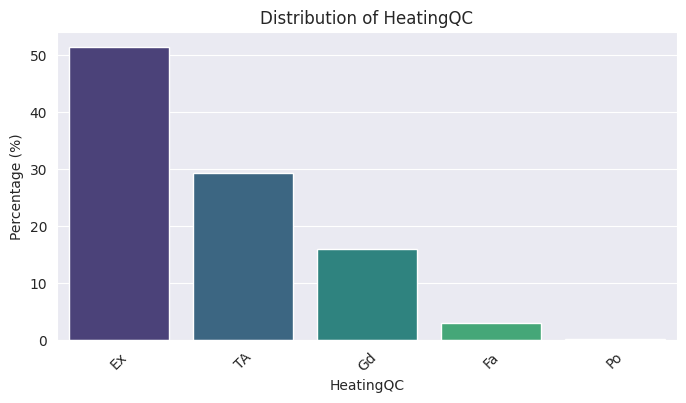


Analyzing column: CentralAir
  Value: Y, Percentage: 93.08%
  Value: N, Percentage: 6.92%


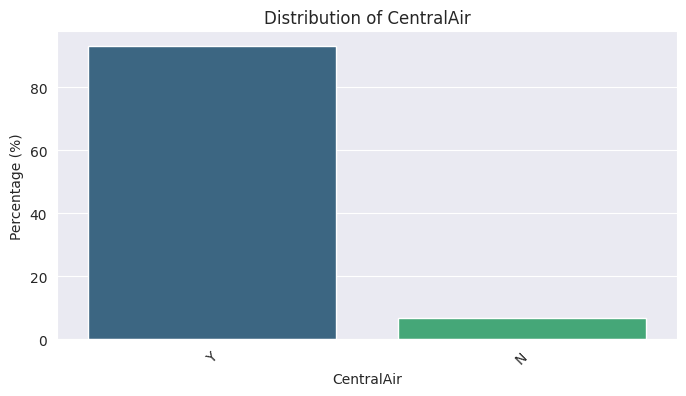


Analyzing column: Electrical
  Value: SBrkr, Percentage: 91.64%
  Value: FuseA, Percentage: 6.44%
  Value: FuseF, Percentage: 1.58%
  Value: FuseP, Percentage: 0.34%


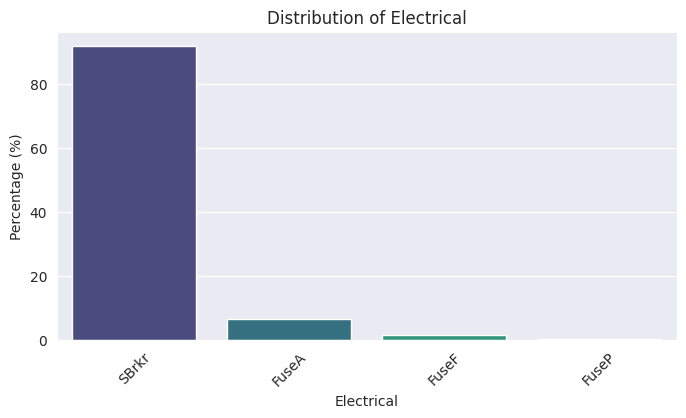


Analyzing column: KitchenQual
  Value: TA, Percentage: 51.92%
  Value: Gd, Percentage: 38.75%
  Value: Ex, Percentage: 7.20%
  Value: Fa, Percentage: 2.13%


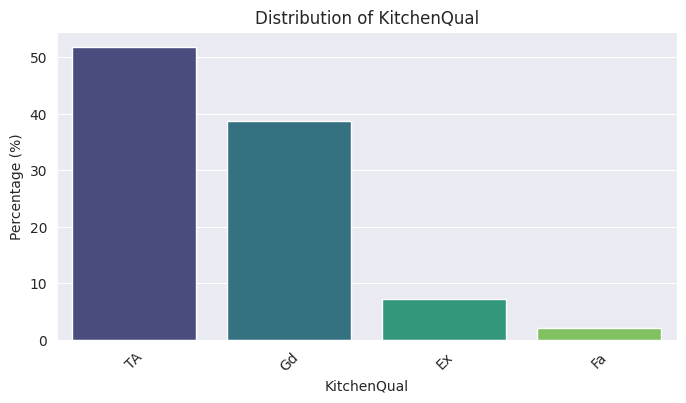


Analyzing column: Functional
  Value: Typ, Percentage: 93.14%
  Value: Min2, Percentage: 2.47%
  Value: Min1, Percentage: 2.33%
  Value: Mod, Percentage: 1.37%
  Value: Maj1, Percentage: 0.34%
  Value: Maj2, Percentage: 0.27%
  Value: Sev, Percentage: 0.07%


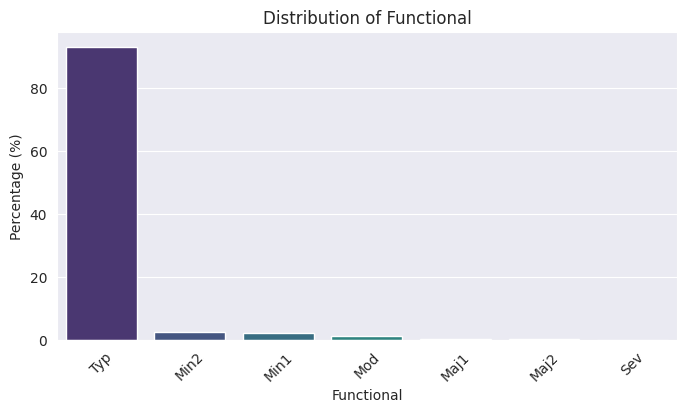


Analyzing column: FireplaceQu
  Value: Gd, Percentage: 49.93%
  Value: TA, Percentage: 38.27%
  Value: Fa, Percentage: 5.62%
  Value: Po, Percentage: 3.57%
  Value: Ex, Percentage: 2.61%


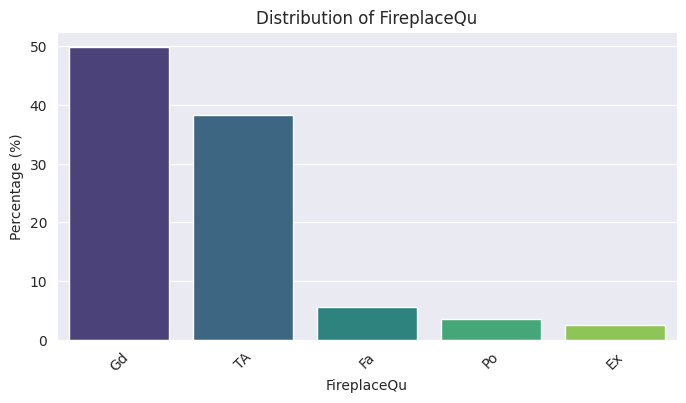


Analyzing column: GarageType
  Value: Attchd, Percentage: 61.68%
  Value: Detchd, Percentage: 28.34%
  Value: BuiltIn, Percentage: 7.09%
  Value: Basment, Percentage: 1.23%
  Value: 2Types, Percentage: 1.23%
  Value: CarPort, Percentage: 0.43%


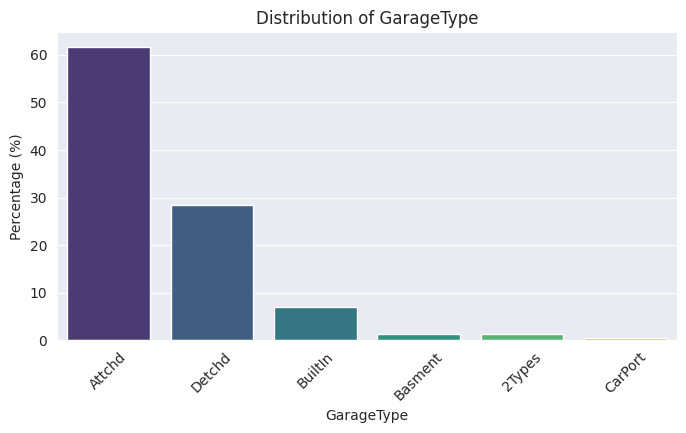


Analyzing column: GarageFinish
  Value: Unf, Percentage: 45.26%
  Value: RFn, Percentage: 28.17%
  Value: Fin, Percentage: 26.57%


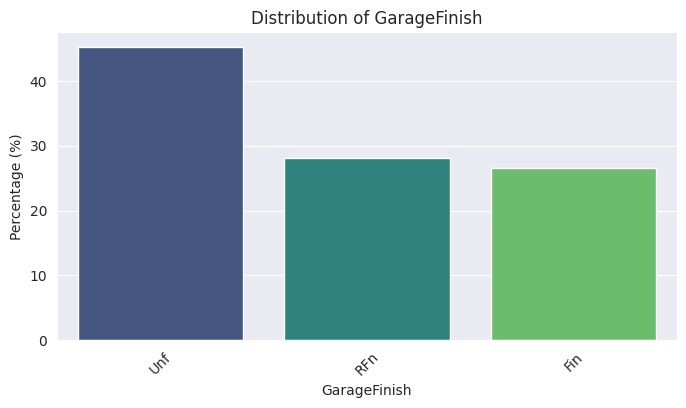


Analyzing column: GarageQual
  Value: TA, Percentage: 93.63%
  Value: Fa, Percentage: 5.50%
  Value: Gd, Percentage: 0.72%
  Value: Po, Percentage: 0.14%


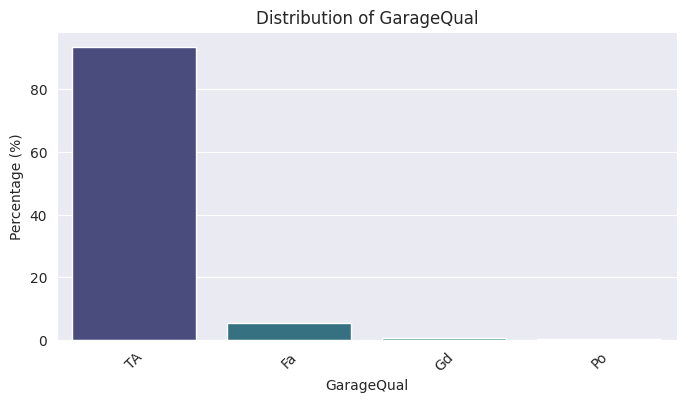


Analyzing column: GarageCond
  Value: TA, Percentage: 96.16%
  Value: Fa, Percentage: 2.82%
  Value: Po, Percentage: 0.51%
  Value: Gd, Percentage: 0.43%
  Value: Ex, Percentage: 0.07%


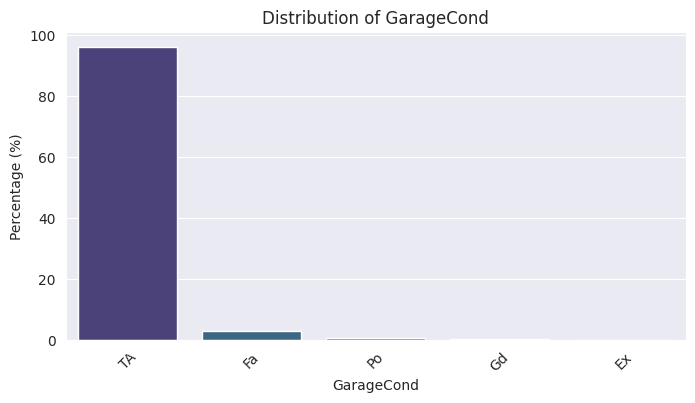


Analyzing column: PavedDrive
  Value: Y, Percentage: 89.17%
  Value: N, Percentage: 8.64%
  Value: P, Percentage: 2.19%


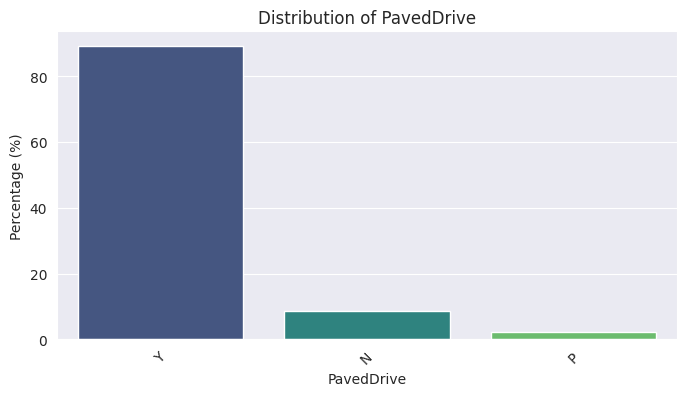


Analyzing column: PoolQC
  Value: Ex, Percentage: 66.67%
  Value: Gd, Percentage: 33.33%


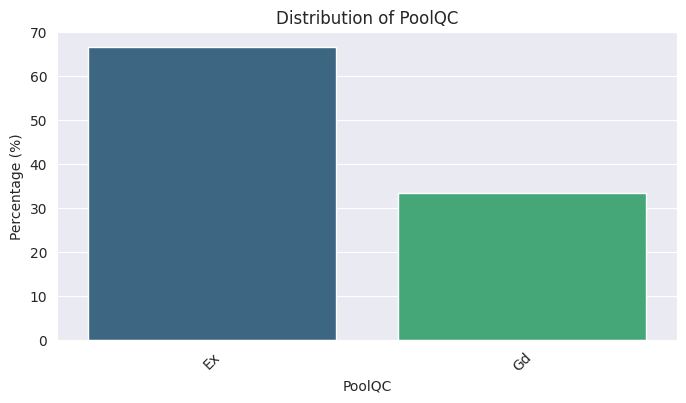


Analyzing column: Fence
  Value: MnPrv, Percentage: 59.31%
  Value: GdPrv, Percentage: 20.34%
  Value: GdWo, Percentage: 20.00%
  Value: MnWw, Percentage: 0.34%


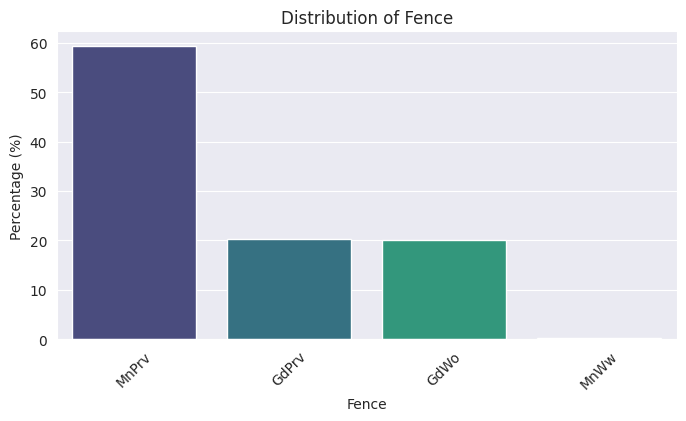


Analyzing column: MiscFeature
  Value: Shed, Percentage: 90.20%
  Value: Gar2, Percentage: 5.88%
  Value: Othr, Percentage: 3.92%


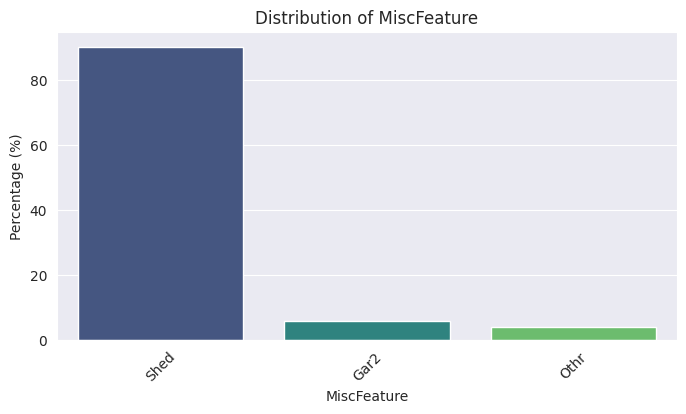


Analyzing column: SaleType
  Value: WD, Percentage: 86.28%
  Value: New, Percentage: 8.02%
  Value: COD, Percentage: 3.02%
  Value: ConLD, Percentage: 1.17%
  Value: CWD, Percentage: 0.55%
  Value: Oth, Percentage: 0.27%
  Value: ConLI, Percentage: 0.27%
  Value: ConLw, Percentage: 0.21%
  Value: Con, Percentage: 0.21%


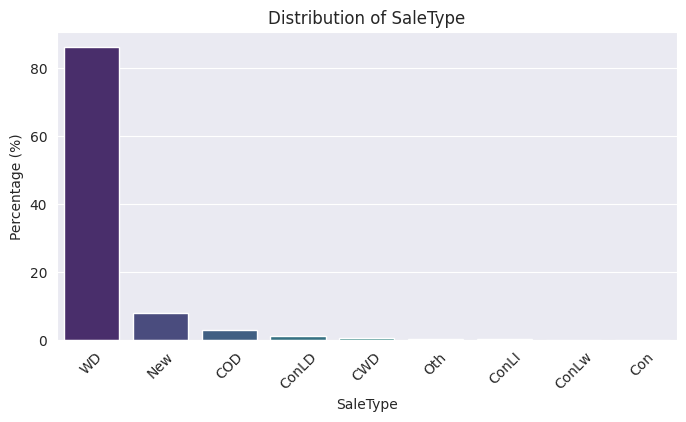


Analyzing column: SaleCondition
  Value: Normal, Percentage: 82.52%
  Value: Partial, Percentage: 8.22%
  Value: Abnorml, Percentage: 6.10%
  Value: Family, Percentage: 1.78%
  Value: Alloca, Percentage: 0.82%
  Value: AdjLand, Percentage: 0.55%


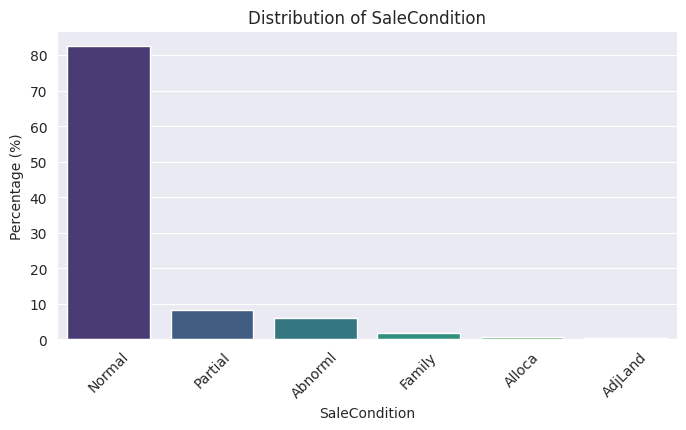

In [ ]:
analyze_categorical_features(prueba)

#Combine all datasets to handle missing values.

In [ ]:
# Obtain the number of samples in each dataset.
nentrenamiento = entrenamiento.shape[0]
nprueba = prueba.shape[0]

# Save the target variable before combining datasets
y_entrenamiento = entrenamiento.SalePrice.values

# Unite training and test in a single dataset for preprocessing
todos_los_datos = pd.concat((entrenamiento, prueba)).reset_index(drop=True)

# Remove SalePrice as it is only present in training
todos_los_datos.drop(['SalePrice'], axis=1, inplace=True)

# Show combined dataset size
print("The combined dataset size is : {}".format(todos_los_datos.shape))


The combined dataset size is : (2917, 79)


#Missing Values

In [ ]:
# Calculate percentage of null values per column
datos_nulos = (todos_los_datos.isnull().sum() / len(todos_los_datos)) * 100

# Eliminate columns without null values and sort by the most problematic ones
datos_nulos = datos_nulos.drop(datos_nulos[datos_nulos == 0].index).sort_values(ascending=False)[:30]

# Create DataFrame with the ratio of null values
datos_faltantes = pd.DataFrame({'Percentage of Missing Data': datos_nulos})

# Display the first 50 columns with the most null values
datos_faltantes.head(50)

Percentage of Missing Data
PoolQC                         99.691464
MiscFeature                    96.400411
Alley                          93.212204
Fence                          80.425094
MasVnrType                     60.541652
FireplaceQu                    48.680151
LotFrontage                    16.660953
GarageQual                      5.450806
GarageYrBlt                     5.450806
GarageCond                      5.450806
GarageFinish                    5.450806
GarageType                      5.382242
BsmtExposure                    2.811107
BsmtCond                        2.811107
BsmtQual                        2.776826
BsmtFinType2                    2.742544
BsmtFinType1                    2.708262
MasVnrArea                      0.788481
MSZoning                        0.137127
BsmtFullBath                    0.068564
Functional                      0.068564
BsmtHalfBath                    0.068564
Utilities                       0.068564
BsmtFinSF1                      0.034282
Exterior2nd                     0.034282
Exterior1st                     0.034282
Electrical                      0.034282
TotalBsmtSF                     0.034282
BsmtUnfSF                       0.034282
BsmtFinSF2                      0.034282

<ipython-input-21-e0722c33d3b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_faltantes.index, y=top_10_faltantes['Percentage of Missing Data'], palette="viridis")


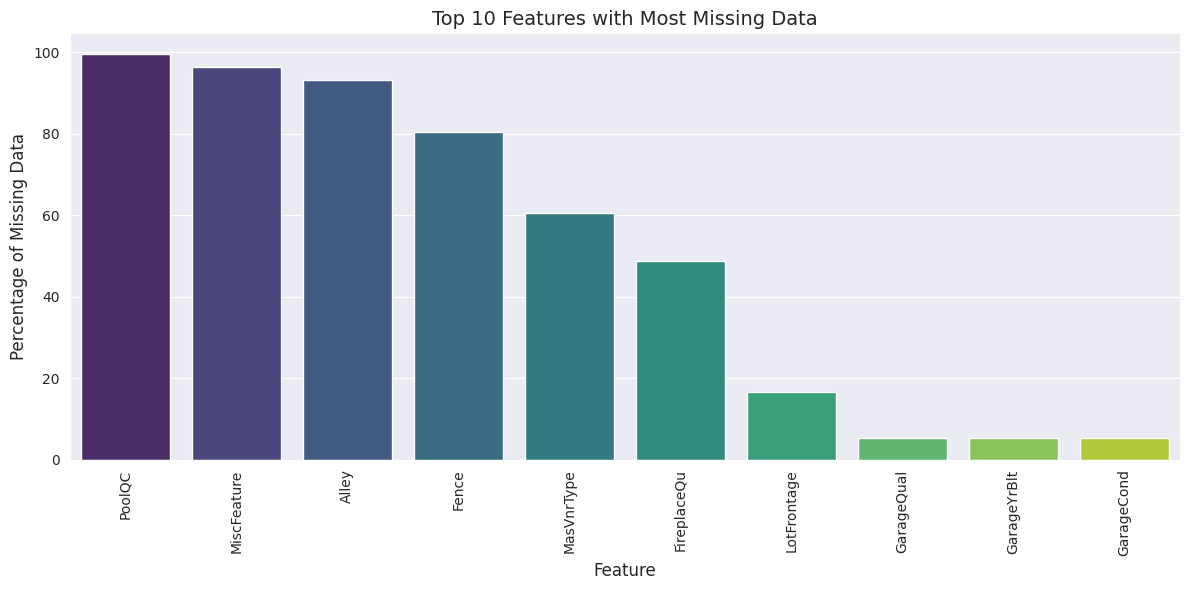

In [ ]:
top_10_faltantes = datos_faltantes.nlargest(10, 'Percentage of Missing Data')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_faltantes.index, y=top_10_faltantes['Percentage of Missing Data'], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Percentage of Missing Data", fontsize=12)
plt.title("Top 10 Features with Most Missing Data", fontsize=14)
plt.tight_layout()
plt.show()


#Imputation


* PoolQC : data description says NA means "No Pool". The majority of houses have no Pool at all in general, so it will be imputed with None.

* MiscFeature: Data description says NA means "no misc feature". Assuming that there is no misc feature.

* Alley : Data description says NA means "no alley access". Assuming that there is no alley access.

* Fence : The data description says NA means "no fence". Therefore, the assumption is that the house has no fence.

* FireplaceQu : data description says NA means "no fireplace". The assumption is that the houses don't have a fireplace.

* LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , I can assume that fill in missing values by the median LotFrontage of the neighborhood.

* GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None.

* GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0.

* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

* MSZoning (The general zoning classification) : 'RL' is by far the most common value.

* Drop Utilities as >99% of the values say "AllPub"

In [ ]:
todos_los_datos["PoolQC"] = todos_los_datos["PoolQC"].fillna("None")
todos_los_datos["MiscFeature"] = todos_los_datos["MiscFeature"].fillna("None")
todos_los_datos["Alley"] = todos_los_datos["Alley"].fillna("None")
todos_los_datos["Fence"] = todos_los_datos["Fence"].fillna("None")
todos_los_datos["FireplaceQu"] = todos_los_datos["FireplaceQu"].fillna("None")

# Fill missing values in "LotFrontage" using the median of each neighborhood
todos_los_datos["LotFrontage"] = todos_los_datos.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for data in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    todos_los_datos[data] = todos_los_datos[data].fillna('None')

for data in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    todos_los_datos[data] = todos_los_datos[data].fillna(0)

for data in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    todos_los_datos[data] = todos_los_datos[data].fillna(0)

for data in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    todos_los_datos[data] = todos_los_datos[data].fillna('None')

todos_los_datos["MasVnrType"] = todos_los_datos["MasVnrType"].fillna("None")
todos_los_datos["MasVnrArea"] = todos_los_datos["MasVnrArea"].fillna(0)

todos_los_datos['MSZoning'] = todos_los_datos['MSZoning'].fillna(entrenamiento['MSZoning'].mode()[0])

todos_los_datos = todos_los_datos.drop(['Utilities'], axis=1)

todos_los_datos["Functional"] = todos_los_datos["Functional"].fillna("Typ")
todos_los_datos['Electrical'] = todos_los_datos['Electrical'].fillna(entrenamiento['Electrical'].mode()[0])
todos_los_datos['KitchenQual'] = todos_los_datos['KitchenQual'].fillna(entrenamiento['KitchenQual'].mode()[0])
todos_los_datos['Exterior1st'] = todos_los_datos['Exterior1st'].fillna(entrenamiento['Exterior1st'].mode()[0])
todos_los_datos['Exterior2nd'] = todos_los_datos['Exterior2nd'].fillna(entrenamiento['Exterior2nd'].mode()[0])
todos_los_datos['SaleType'] = todos_los_datos['SaleType'].fillna(entrenamiento['SaleType'].mode()[0])
todos_los_datos['MSSubClass'] = todos_los_datos['MSSubClass'].fillna("None")
todos_los_datos.fillna({"TotalBaths": 1}, inplace=True)

In [ ]:
#Check remaining missing values if any
all_data_na = (todos_los_datos.isnull().sum() / len(todos_los_datos)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

#Creating New Features

In [ ]:
# Age of the house
todos_los_datos['Age'] = todos_los_datos['YrSold'] - todos_los_datos['YearBuilt']

# Time since last remodeling
todos_los_datos['SinceRemodel'] = todos_los_datos['YrSold'] - todos_los_datos['YearRemodAdd']

# Total bathrooms
todos_los_datos['TotalBaths'] = todos_los_datos['FullBath'] + (todos_los_datos['HalfBath'] * 0.5) + todos_los_datos['BsmtFullBath'] + (todos_los_datos['BsmtHalfBath'] * 0.5)

# Total living area
todos_los_datos['TotalSF'] = todos_los_datos['TotalBsmtSF'] + todos_los_datos['1stFlrSF'] + todos_los_datos['2ndFlrSF']

# Interaction between quality and surface
todos_los_datos['Qual_LivArea'] = todos_los_datos['OverallQual'] * todos_los_datos['GrLivArea']

# Percentage of finished basement
todos_los_datos['BsmtFinPct'] = (todos_los_datos['BsmtFinSF1'] + todos_los_datos['BsmtFinSF2']) / todos_los_datos['TotalBsmtSF']
todos_los_datos["BsmtFinPct"] = todos_los_datos["BsmtFinPct"].fillna(0) # Avoid null values by divisions

todos_los_datos['overall cond-qual'] = todos_los_datos['OverallQual'] + todos_los_datos['OverallCond']
todos_los_datos['YearRemodAdd-YearBuilt '] = todos_los_datos['YearRemodAdd'] - todos_los_datos['YearBuilt']
todos_los_datos['PorchArea'] = todos_los_datos['OpenPorchSF'] + todos_los_datos['EnclosedPorch'] + todos_los_datos['3SsnPorch'] + todos_los_datos['ScreenPorch']
todos_los_datos["outdoor"] = (todos_los_datos["WoodDeckSF"] + todos_los_datos["OpenPorchSF"])**2
todos_los_datos["overall"] = todos_los_datos["OverallQual"] * todos_los_datos["OverallCond"]



# Show the new columns created

todos_los_datos[['Age', 'SinceRemodel', 'TotalBaths', 'TotalSF', 'Qual_LivArea', 'BsmtFinPct','overall cond-qual','YearRemodAdd-YearBuilt ','PorchArea',"outdoor","overall"]].head()

Age  SinceRemodel  TotalBaths  TotalSF  Qual_LivArea  BsmtFinPct  \
0    5             5         3.5   2566.0         11970    0.824766   
1   31            31         2.5   2524.0          7572    0.774960   
2    7             6         3.5   2706.0         12502    0.528261   
3   91            36         2.0   2473.0         12019    0.285714   
4    8             8         3.5   3343.0         17584    0.572052   

   overall cond-qual  YearRemodAdd-YearBuilt   PorchArea  outdoor  overall  
0                 12                        0         61     3721       35  
1                 14                        0          0    88804       48  
2                 12                        1         42     1764       35  
3                 12                       55        307     1225       35  
4                 13                        0         84    76176       40

#Check High Correlations

In [ ]:
# Detect high correlations between characteristics (greater than 0.75).
correlation_threshold = 0.70
high_corr = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
high_corr = high_corr[(high_corr >= correlation_threshold) & (high_corr < 1)]

high_corr

GarageCars    GarageArea    0.882475
GarageYrBlt   YearBuilt     0.825667
TotRmsAbvGrd  GrLivArea     0.825489
TotalBsmtSF   1stFlrSF      0.819530
OverallQual   SalePrice     0.790982
SalePrice     GrLivArea     0.708624
dtype: float64

In [ ]:
redundant_cols = ['GarageYrBlt', 'YrSold']
todos_los_datos.drop(columns=redundant_cols, inplace=True)
todos_los_datos.drop(columns=['GarageCars'], inplace=True)
todos_los_datos.drop(columns=['TotRmsAbvGrd'], inplace=True)
todos_los_datos.drop(columns=['1stFlrSF'], inplace=True)

#Ordinal Encoder

In [ ]:
todos_los_datos["BsmtQual"] = todos_los_datos["BsmtQual"].fillna("NA")
todos_los_datos["ExterQual"] = todos_los_datos["ExterQual"].fillna("NA")
todos_los_datos["KitchenQual"] = todos_los_datos["KitchenQual"].fillna("NA")

# Define categories in logical order
ordinal_cols = ['ExterQual', 'BsmtQual', 'KitchenQual']
ord_map = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']
}

# Apply OrdinalEncoder with unknown value handling
ord_encoder = OrdinalEncoder(categories=[ord_map[col] for col in ordinal_cols],
                             handle_unknown='use_encoded_value', unknown_value=-1)

todos_los_datos[ordinal_cols] = ord_encoder.fit_transform(todos_los_datos[ordinal_cols])

# Display result of ordinal coding
print(todos_los_datos[ordinal_cols].head())

   ExterQual  BsmtQual  KitchenQual
0        3.0       4.0          3.0
1        2.0       4.0          2.0
2        3.0       4.0          3.0
3        2.0       3.0          3.0
4        3.0       4.0          3.0


#One-Hot Encoder for dummy variables

In [ ]:
# Select remaining categorical columns
cat_cols = todos_los_datos.select_dtypes(include=['object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(todos_los_datos[cat_cols]),
                            columns=encoder.get_feature_names_out(cat_cols))

# Replace categorical columns with coded columns
todos_los_datos = pd.concat([todos_los_datos.drop(cat_cols, axis=1), encoded_cols], axis=1)

# Confirm that there are no more categorical columns
print(todos_los_datos.dtypes.value_counts())


float64    226
int64       30
Name: count, dtype: int64


In [ ]:
# Separate the combined dataset into training and testing
train_data = todos_los_datos.iloc[:1458, :]
test_data = todos_los_datos.iloc[1458:, :]

# Make sure that there are no null values.
print(f"Size of training data after restoration: {train_data.shape}")
print(f"Size of test data after restoration: {test_data.shape}")

Size of training data after restoration: (1458, 256)
Size of test data after restoration: (1459, 256)


In [ ]:
train_data.loc[:, "Sales_Price"] = y_entrenamiento

<ipython-input-30-5baf8c2309d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, "Sales_Price"] = y_entrenamiento


#Normalize the Sale Price


 mu = 180932.92 and sigma = 79467.79



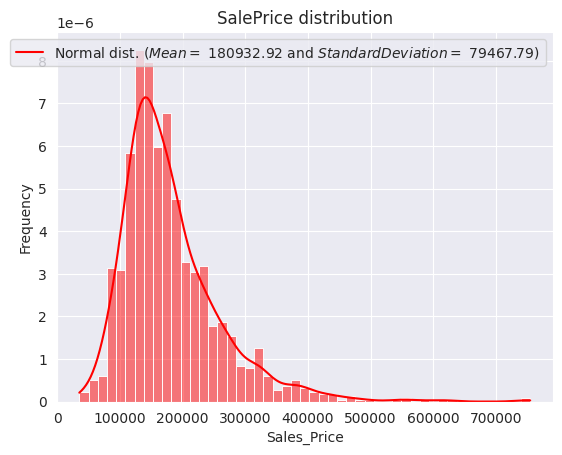

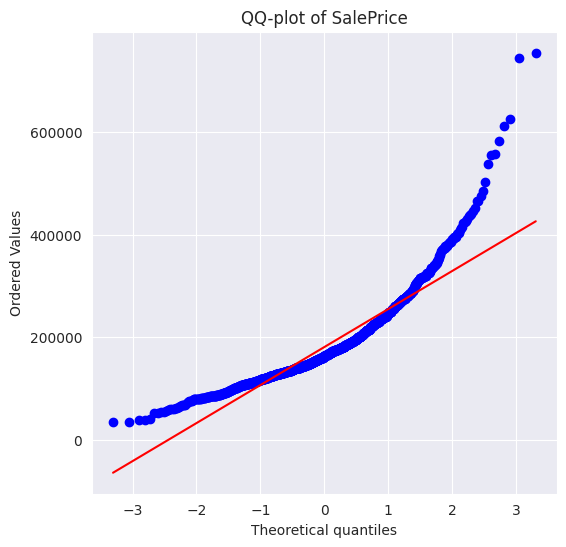

In [ ]:
# Distribution plot with normal fit
sns.histplot(train_data['Sales_Price'], kde=True, stat="density", color="Red")

# Get the fitted parameters (mean and standard deviation)
(media1, sd1) = norm.fit(train_data['Sales_Price'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(media1, sd1))

# Plot the normal distribution curve
plt.legend(['Normal dist. ($Mean=$ {:.2f} and $Standard Deviation=$ {:.2f})'.format(media1, sd1)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot to check normality
fig = plt.figure(figsize=(6, 6))
stats.probplot(train_data['Sales_Price'], plot=plt)
plt.title('QQ-plot of SalePrice')

# Show plots
plt.show()

It can be seen how the graphs follow a normal distribution at the mean values, while at the extremes this distribution is lost. The target variable is right skewed, so, some of the values on the right might be trated.

<ipython-input-32-3c3167eaf673>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.24769912 12.10901644 12.31717117 ... 12.49313327 11.86446927
 11.90159023]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[:, "Sales_Price"] = np.log1p(train_data["Sales_Price"])



 mu = 12.02 and sigma = 0.40



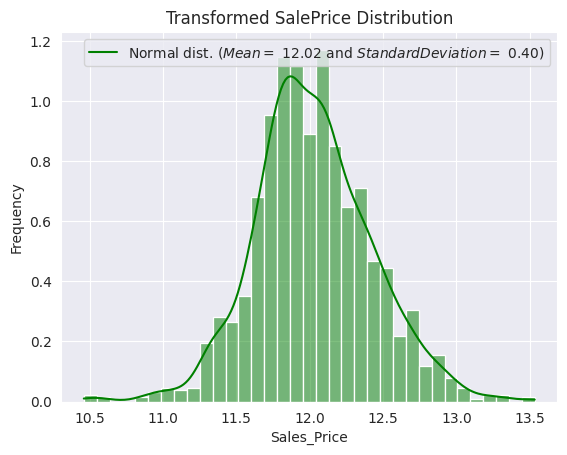

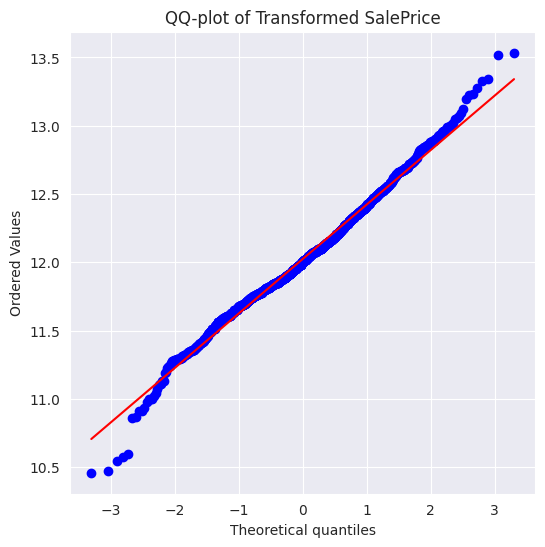

In [ ]:
# Apply log transformation to SalePrice
train_data.loc[:, "Sales_Price"] = np.log1p(train_data["Sales_Price"])

# Plot the new distribution
sns.histplot(train_data['Sales_Price'], kde=True, stat="density", color="green")

# Get the fitted parameters (mean and std deviation)
(media2, sd2) = norm.fit(train_data['Sales_Price'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(media2, sd2))

# Add legend with normal distribution info
plt.legend(['Normal dist. ($Mean=$ {:.2f} and $Standard Deviation=$ {:.2f})'.format(media2, sd2)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Transformed SalePrice Distribution')

# QQ-plot to check normality
fig = plt.figure(figsize=(6, 6))
stats.probplot(train_data['Sales_Price'], plot=plt)
plt.title('QQ-plot of Transformed SalePrice')

# Show plots
plt.show()

#Prepare the data for the models

In [ ]:
# Split training data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(
    train_data.drop("Sales_Price", axis=1),
    train_data["Sales_Price"],
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1166, 256), (1166,), (292, 256), (292,))

#XGBoost

In [ ]:
# Creating and training the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 7,
                          alpha = 3,
                          n_estimators = 100)

# Train the model with training data
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=3, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Make predictions on the validation set
y_pred = xg_reg.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(rmse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R^2
r2 = r2_score(y_val, y_pred)
print(f"R^2: {r2}")

Root Mean Squared Error (RMSE): 0.1333151200943061
R^2: 0.8945704404932809


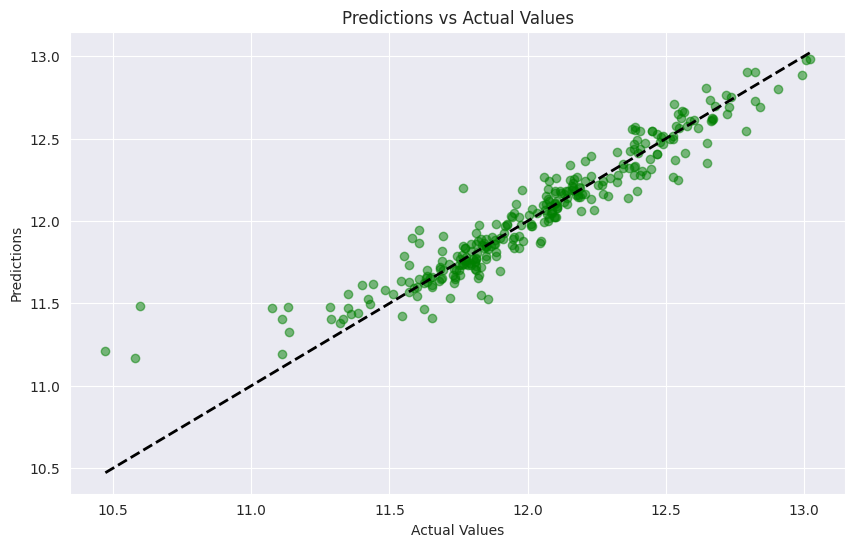

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Actual Values')
plt.show()


Root Mean Squared Error (RMSE) on Original Scale: 20777.14053653229
R^2 on Original Scale: 0.9218481396954915


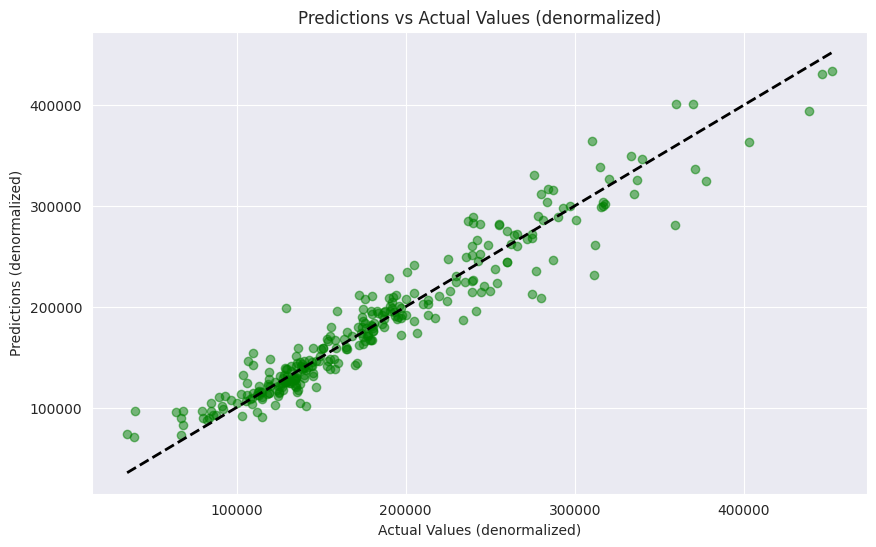

In [ ]:
# Make predictions on the validation set
y_pred = xg_reg.predict(X_val)

# Inverse transform the predicted and actual values to get original scale
y_pred_original = np.expm1(y_pred)
y_val_original = np.expm1(y_val)

# Calculate RMSE on the original scale
rmse_original = mean_squared_error(y_val_original, y_pred_original)
rmse_original = np.sqrt(rmse_original)
print(f"Root Mean Squared Error (RMSE) on Original Scale: {rmse_original}")

# Calculate R^2 on the original scale
r2_original = r2_score(y_val_original, y_pred_original)
print(f"R^2 on Original Scale: {r2_original}")

# Plot predictions vs actual values on the original scale
plt.figure(figsize=(10, 6))
plt.scatter(y_val_original, y_pred_original, alpha=0.5, color='green')
plt.plot([y_val_original.min(), y_val_original.max()], [y_val_original.min(), y_val_original.max()], 'k--', lw=2)
plt.xlabel('Actual Values (denormalized)')
plt.ylabel('Predictions (denormalized)')
plt.title('Predictions vs Actual Values (denormalized)')
plt.show()

In [ ]:
# Make predictions on the test data using the trained XGBoost model
y_pred_test = xg_reg.predict(test_data)

# Reverse the log transformation to get the original SalePrice scale
y_pred_test_original = np.expm1(y_pred_test)

# Create a submission DataFrame
predictions_xgb = pd.DataFrame({'Id': id_prueba, 'SalePrice': y_pred_test_original})
predictions_xgb

Id      SalePrice
0     1461  120710.132812
1     1462  162744.640625
2     1463  182200.468750
3     1464  188825.953125
4     1465  192411.812500
...    ...            ...
1454  2915   85095.367188
1455  2916   84738.468750
1456  2917  159327.375000
1457  2918  113439.992188
1458  2919  207124.531250

[1459 rows x 2 columns]

#Random Forest

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of Trees
    max_depth=9,  # Max Depth
    max_features=0.5,  # Column Sample by Tree
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Calculate RMSE
rmse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(rmse_rf)
print(f"Root Mean Squared Error (RMSE) - Random Forest: {rmse_rf}")

# Calculate R^2
r2_rf = r2_score(y_val, y_pred_rf)
print(f"R^2 - Random Forest: {r2_rf}")

Root Mean Squared Error (RMSE) - Random Forest: 0.1374193059125136
R^2 - Random Forest: 0.8879790950331127


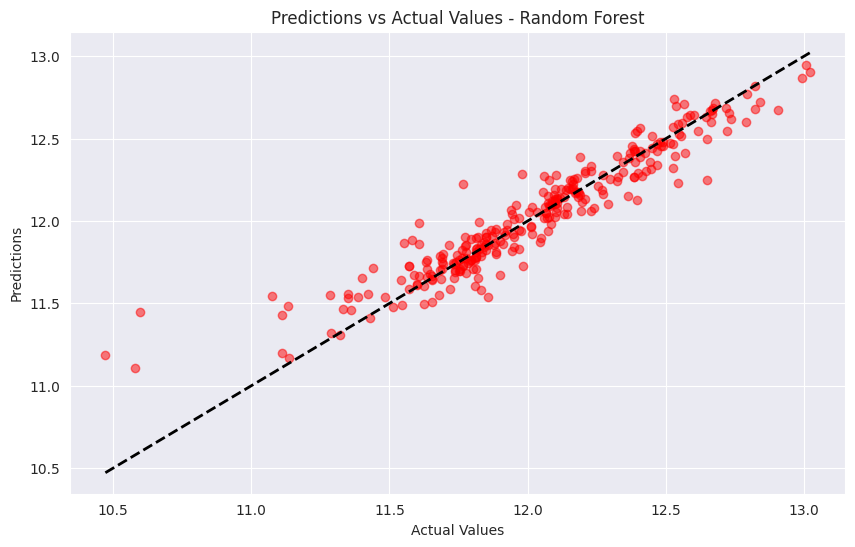

In [ ]:
# Plotting predictions vs. actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_rf, alpha=0.5, color='red')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2 )
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Actual Values - Random Forest')
plt.show()

Root Mean Squared Error (RMSE) on Original Scale: 22006.056682674942
R^2 on Original Scale: 0.9123297550188438


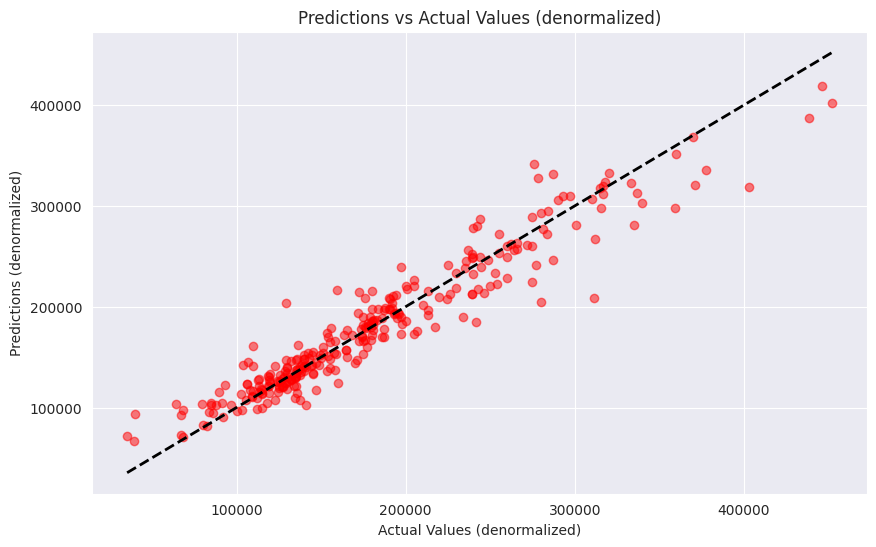

In [ ]:
# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Inverse transform the predicted and actual values to get original scale
y_pred_original = np.expm1(y_pred)
y_val_original = np.expm1(y_val)

# Calculate RMSE on the original scale
rmse_original = mean_squared_error(y_val_original, y_pred_original)
rmse_original = np.sqrt(rmse_original)
print(f"Root Mean Squared Error (RMSE) on Original Scale: {rmse_original}")

# Calculate R^2 on the original scale
r2_original = r2_score(y_val_original, y_pred_original)
print(f"R^2 on Original Scale: {r2_original}")

# Plot predictions vs actual values on the original scale
plt.figure(figsize=(10, 6))
plt.scatter(y_val_original, y_pred_original, alpha=0.5, color='red')
plt.plot([y_val_original.min(), y_val_original.max()], [y_val_original.min(), y_val_original.max()], 'k--', lw=2)
plt.xlabel('Actual Values (denormalized)')
plt.ylabel('Predictions (denormalized)')
plt.title('Predictions vs Actual Values (denormalized)')
plt.show()

In [ ]:
# Make predictions on the test data using the trained Random Forest model
y_pred_test_rf = rf_model.predict(test_data)

# Reverse the log transformation to get the original SalePrice scale
y_pred_test_original_rf = np.expm1(y_pred_test_rf)

# Create a submission DataFrame for Random Forest
predictions_rf = pd.DataFrame({'Id': id_prueba, 'SalePrice': y_pred_test_original_rf})

predictions_rf


Id      SalePrice
0     1461  126444.539535
1     1462  157655.049776
2     1463  174561.865058
3     1464  180953.078985
4     1465  202185.889734
...    ...            ...
1454  2915   92999.789262
1455  2916   95094.035605
1456  2917  153757.463941
1457  2918  115370.185967
1458  2919  219426.756170

[1459 rows x 2 columns]

#Feature Importance#

Feature Importance

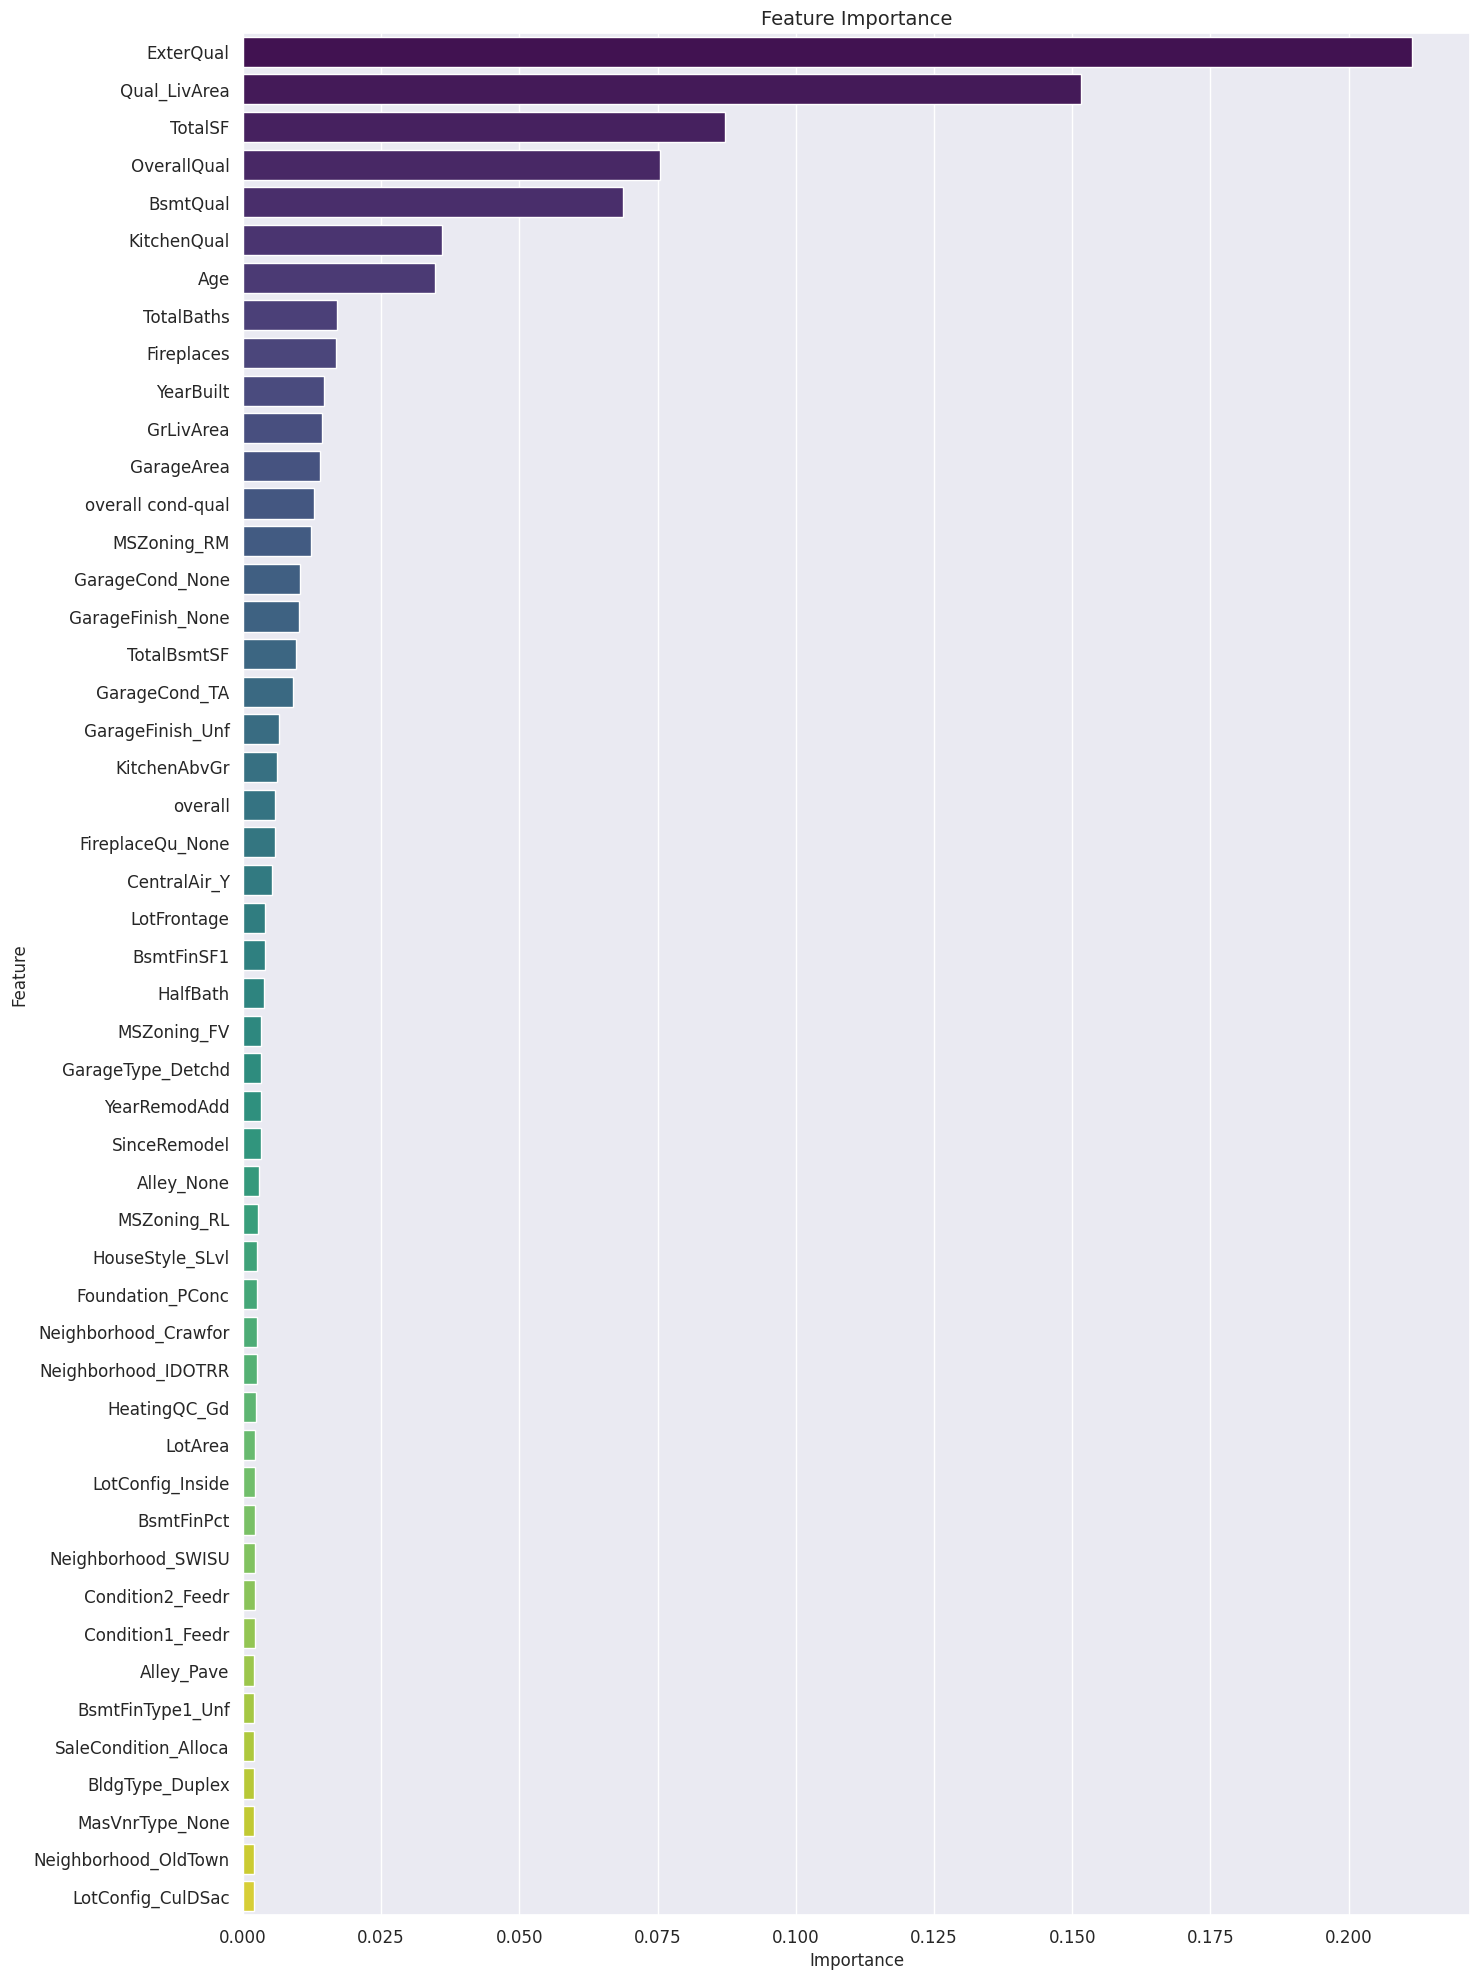

                  Feature     Value
8               ExterQual  0.211442
38           Qual_LivArea  0.151566
37                TotalSF  0.087214
3             OverallQual  0.075363
9                BsmtQual  0.068741
23            KitchenQual  0.035966
34                    Age  0.034780
36             TotalBaths  0.017073
24             Fireplaces  0.016799
5               YearBuilt  0.014704
16              GrLivArea  0.014305
25             GarageArea  0.013892
40      overall cond-qual  0.012941
48            MSZoning_RM  0.012276
227       GarageCond_None  0.010339
217     GarageFinish_None  0.010062
13            TotalBsmtSF  0.009640
229         GarageCond_TA  0.009142
219      GarageFinish_Unf  0.006506
22           KitchenAbvGr  0.006235
44                overall  0.005817
208      FireplaceQu_None  0.005768
195          CentralAir_Y  0.005267
1             LotFrontage  0.003963
10             BsmtFinSF1  0.003928
20               HalfBath  0.003756
45            MSZoning_FV  0

In [ ]:
def plot_importance(model, features, num=50, save=False, filename="feature_importance.png"):
    feature_imp = pd.DataFrame({
        'Feature': features.columns,
        'Value': model.feature_importances_
    }).sort_values(by="Value", ascending=False).head(num)
    plt.figure(figsize=(15, 20))
    sns.set_style("whitegrid")
    sns.set(font_scale=1.1)
    ax = sns.barplot(x="Value", y="Feature", data=feature_imp, hue="Feature", palette="viridis", legend=False)
    ax.set_title("Feature Importance", fontsize=14)
    ax.set_xlabel("Importance", fontsize=12)
    ax.set_ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()
    print(feature_imp)



plot_importance(xg_reg, X_train)

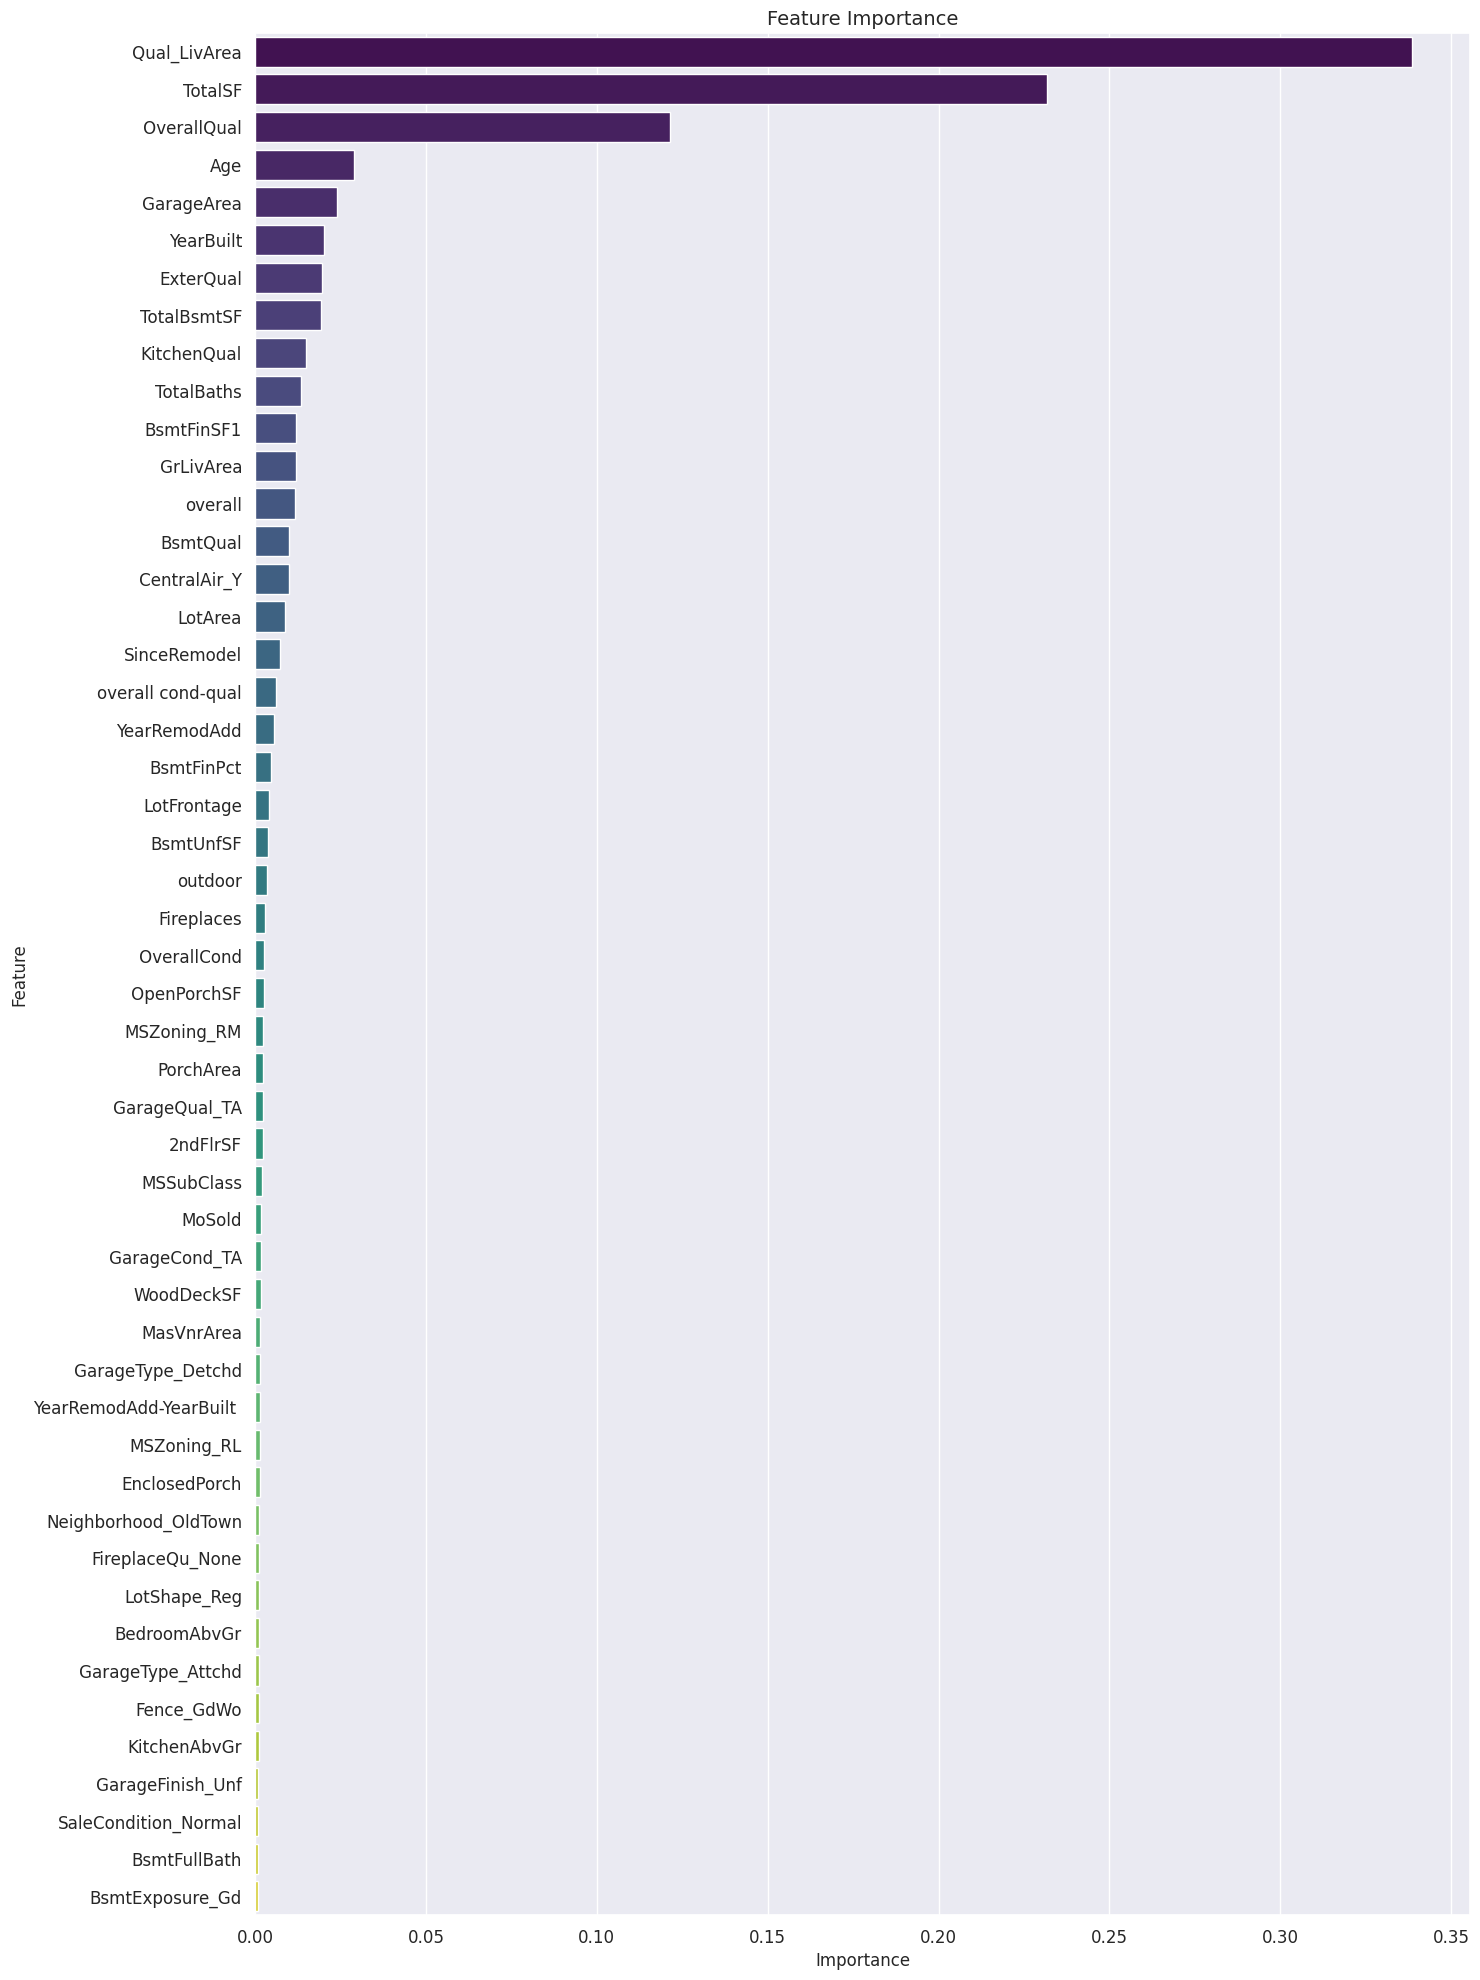

                     Feature     Value
38              Qual_LivArea  0.338696
37                   TotalSF  0.231797
3                OverallQual  0.121334
34                       Age  0.028887
25                GarageArea  0.023830
5                  YearBuilt  0.020008
8                  ExterQual  0.019398
13               TotalBsmtSF  0.019209
23               KitchenQual  0.014719
36                TotalBaths  0.013525
10                BsmtFinSF1  0.011844
16                 GrLivArea  0.011816
44                   overall  0.011584
9                   BsmtQual  0.010000
195             CentralAir_Y  0.009952
2                    LotArea  0.008854
35              SinceRemodel  0.007202
40         overall cond-qual  0.005969
6               YearRemodAdd  0.005567
39                BsmtFinPct  0.004551
1                LotFrontage  0.003995
12                 BsmtUnfSF  0.003753
43                   outdoor  0.003324
24                Fireplaces  0.002787
4                OverallC

In [ ]:
plot_importance(rf_model, X_train)

In [ ]:
xg_reg.save_model("xgboost_model.json")